In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [3]:
# Load the dataset
file_path = 'data/merged_output.xlsx'
df = pd.read_excel(file_path)

data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unnamed:_0.1        4281 non-null   int64  
 1   duration_(ms)       4281 non-null   int64  
 2   danceability        4281 non-null   float64
 3   energy              4281 non-null   float64
 4   loudness            4281 non-null   float64
 5   speechiness         4281 non-null   float64
 6   acousticness        4281 non-null   float64
 7   instrumentalness    4281 non-null   float64
 8   liveness            4281 non-null   float64
 9   valence             4281 non-null   float64
 10  tempo               4281 non-null   float64
 11  spec_rate           4281 non-null   float64
 12  labels              4281 non-null   int64  
 13  spotify_uri         4281 non-null   object 
 14  track_name          4281 non-null   object 
 15  artist_name         4281 non-null   object 
 16  url_la

(None,
    unnamed:_0.1  duration_(ms)  danceability  energy  loudness  speechiness  \
 0            44         198440         0.655   0.560    -6.857       0.0486   
 1            56         196253         0.544   0.572    -6.205       0.0319   
 2            68         225253         0.600   0.589    -7.297       0.0315   
 3            75         252147         0.471   0.464    -7.941       0.0301   
 4            76         295680         0.602   0.699    -5.097       0.0264   
 
    acousticness  instrumentalness  liveness  valence  ...  zero_crossing_rate  \
 0       0.74900          0.000000    0.1150    0.599  ...            0.045222   
 1       0.11800          0.000000    0.2340    0.520  ...            0.055558   
 2       0.72000          0.000000    0.0634    0.537  ...            0.056722   
 3       0.70200          0.000056    0.1150    0.296  ...            0.044232   
 4       0.00208          0.001430    0.1200    0.283  ...            0.047141   
 
    spectral_cent

# Mood Distribution in the Song Dataset

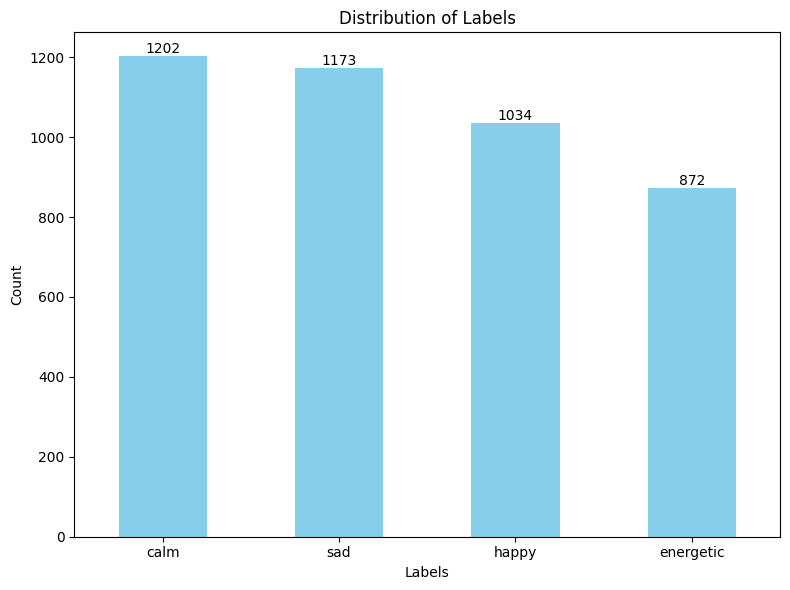

In [4]:
# Mapping from numbers to labels
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}

# Count tracks per label
label_counts = df['labels'].value_counts()

# Replace numerical labels with text labels for plotting
label_counts.index = label_counts.index.map(label_mapping)

# Plot
ax = label_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# Ensure labels on x-axis are horizontal
ax.set_xticklabels(label_counts.index, rotation=0)

# Annotate counts on top of the bars
for idx, value in enumerate(label_counts):
    ax.text(idx, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Correlation of Audio Features with Labels (Moods)

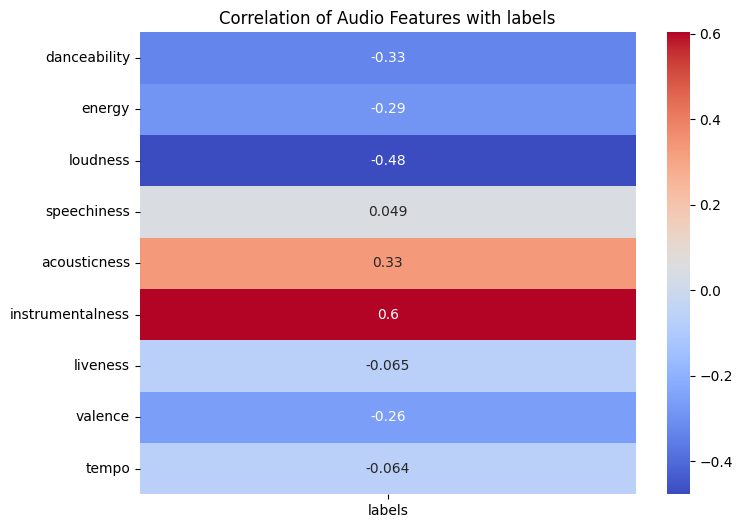

In [5]:
target_column = 'labels'
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

correlation_matrix = df[audio_features + [target_column]].corr()

correlation_with_target = correlation_matrix.loc[audio_features, [target_column]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Correlation of Audio Features with {target_column}')
plt.show()

# Conclusion
The graph shows the relationship between audio features and mood labels. For example, energy exhibits a strong positive correlation of 0.6 with mood labels, indicating its importance in predicting energetic moods. On the other hand, acousticness has a negative correlation of -0.48, suggesting it is more associated with calmer or sadder moods. These insights reveal which audio features most influence the classification of moods in the dataset.

# Distribution of Audio Features in the Dataset

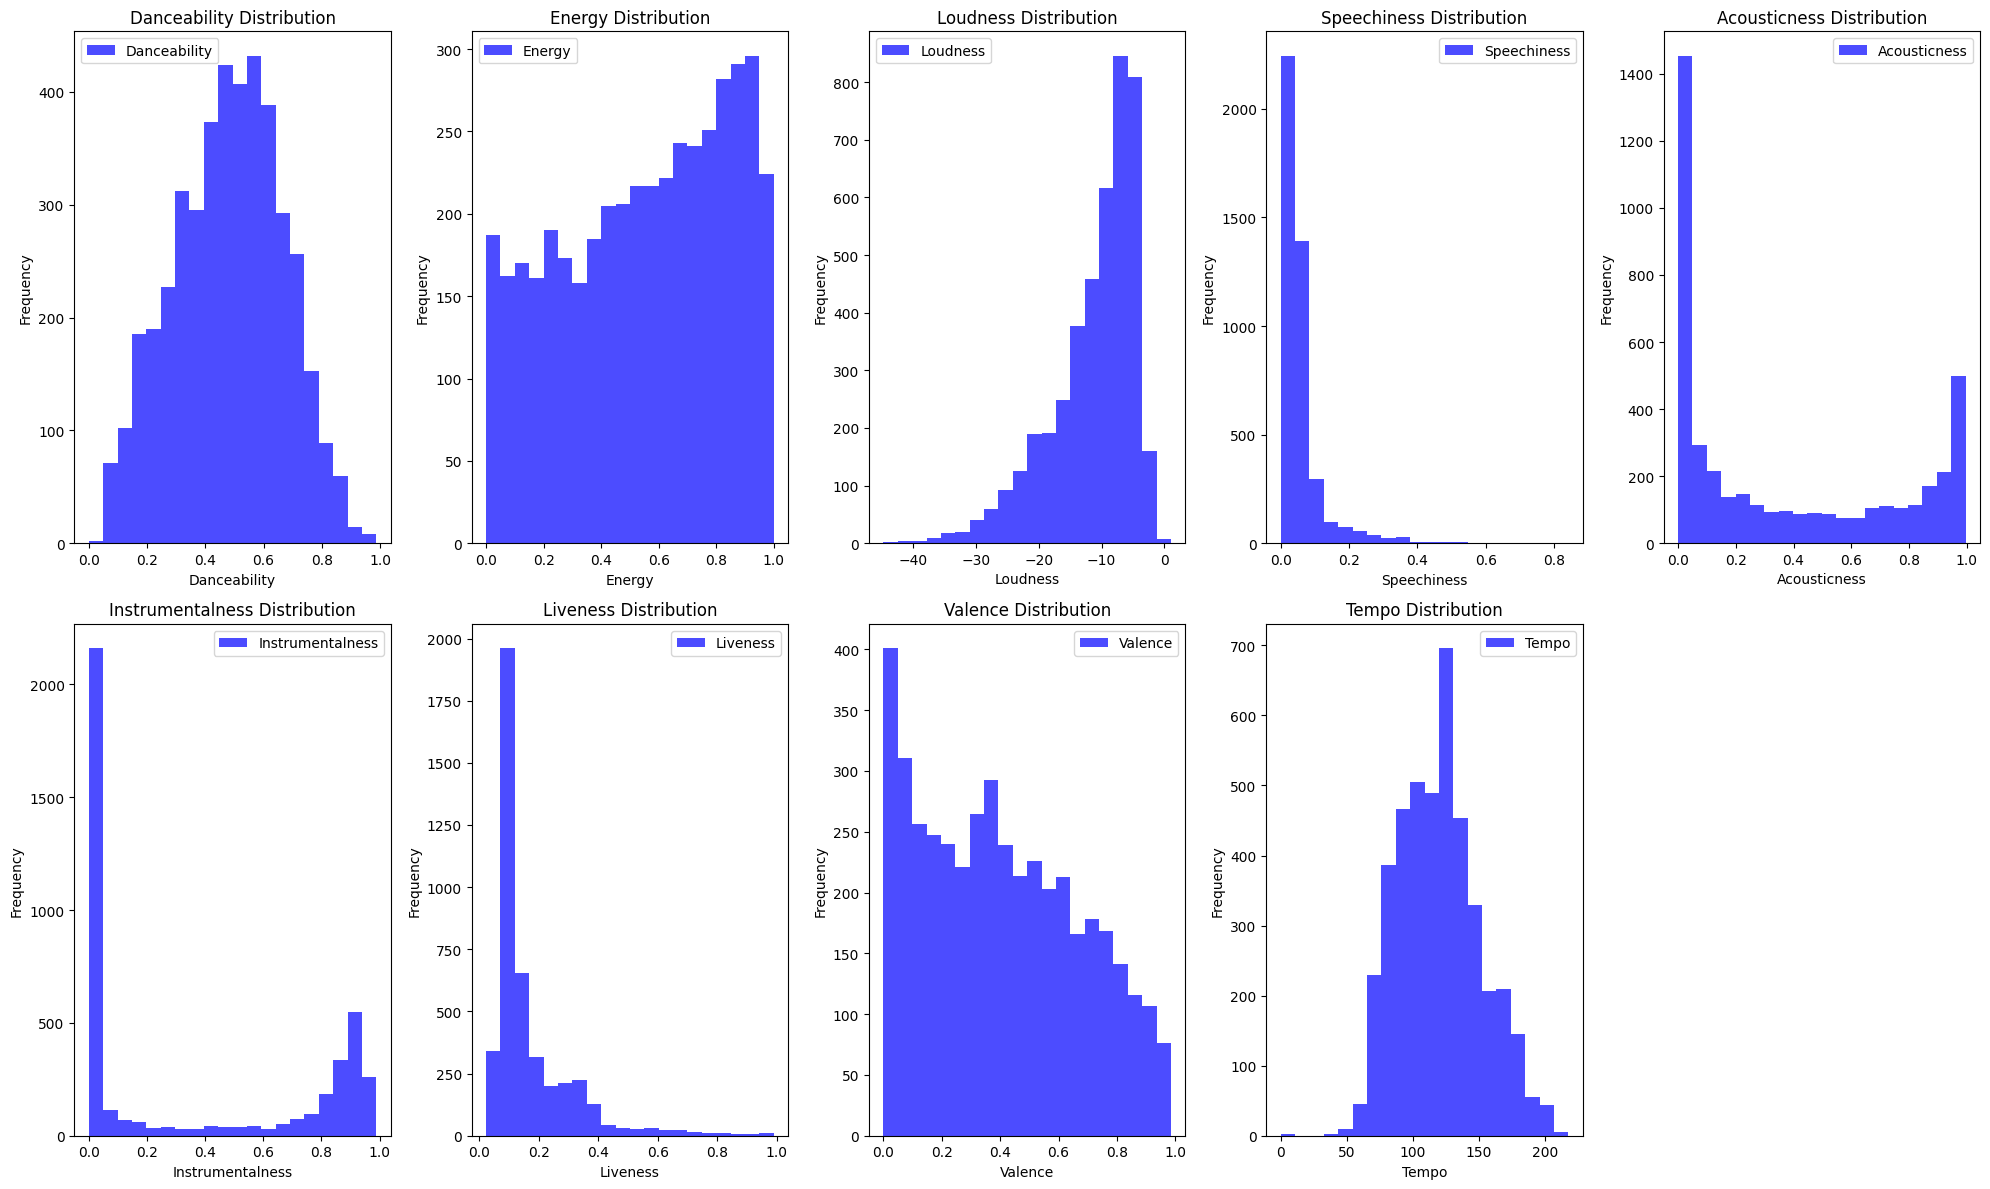

In [6]:
# for feature in audio_features:
#     df[feature].plot(kind='hist', bins=20, alpha=0.7, color='blue', label=feature.capitalize())
#     plt.title(f"{feature.capitalize()} Distribution")
#     plt.xlabel(f"{feature.capitalize()}")
#     plt.ylabel('Frequency')
#     plt.show()

# Define the number of rows and columns for the subplot grid
n_rows, n_cols = 2, 5  # Adjust based on the number of features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()  # Flatten the grid to iterate over the axes easily

# Plot each feature in a separate subplot
for idx, feature in enumerate(audio_features):
    axes[idx].hist(df[feature], bins=20, alpha=0.7, color='blue', label=feature.capitalize())
    axes[idx].set_title(f"{feature.capitalize()} Distribution")
    axes[idx].set_xlabel(feature.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

# Remove empty subplots if the number of features is less than the grid size
for idx in range(len(audio_features), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Conclusion
The histograms reveal diverse distributions among audio features. 

- **Danceability:** The distribution is nearly symmetric, indicating that danceability values are evenly distributed around the mean.
- **Energy:** The distribution is slightly left-skewed, meaning there are marginally more high-energy tracks than low-energy ones.
- **Loudness:** The distribution is moderately left-skewed, with a higher concentration of tracks having louder audio levels.
- **Speechiness:** The distribution is highly right-skewed, indicating most tracks have low speechiness, with a few outliers having high values.
- **Acousticness:** The distribution of acousticness in the dataset is bimodal, with prominent peaks at the extreme values of 0 and 1. This suggests that most tracks are either highly non-acoustic or highly acoustic, with relatively fewer tracks having moderate acousticness values (between 0.1 and 0.9)
- **Instrumentalness:** The distribution is right-skewed, with a dominant concentration of tracks at the lower end (non-instrumental) and a secondary peak near the upper end, indicating tracks with high instrumentalness. Tracks with moderate instrumentalness are rare.
- **Liveness:** The distribution is strongly right-skewed, with most tracks having low liveness and a few with high liveness values.
- **Valence:** The distribution is slightly right-skewed, indicating a balanced but slightly higher number of tracks with lower positivity.
- **Tempo:** The distribution is slightly right-skewed, showing a slight predominance of slower tempo tracks with some faster ones.

# Variations in Audio Features Across Mood Labels

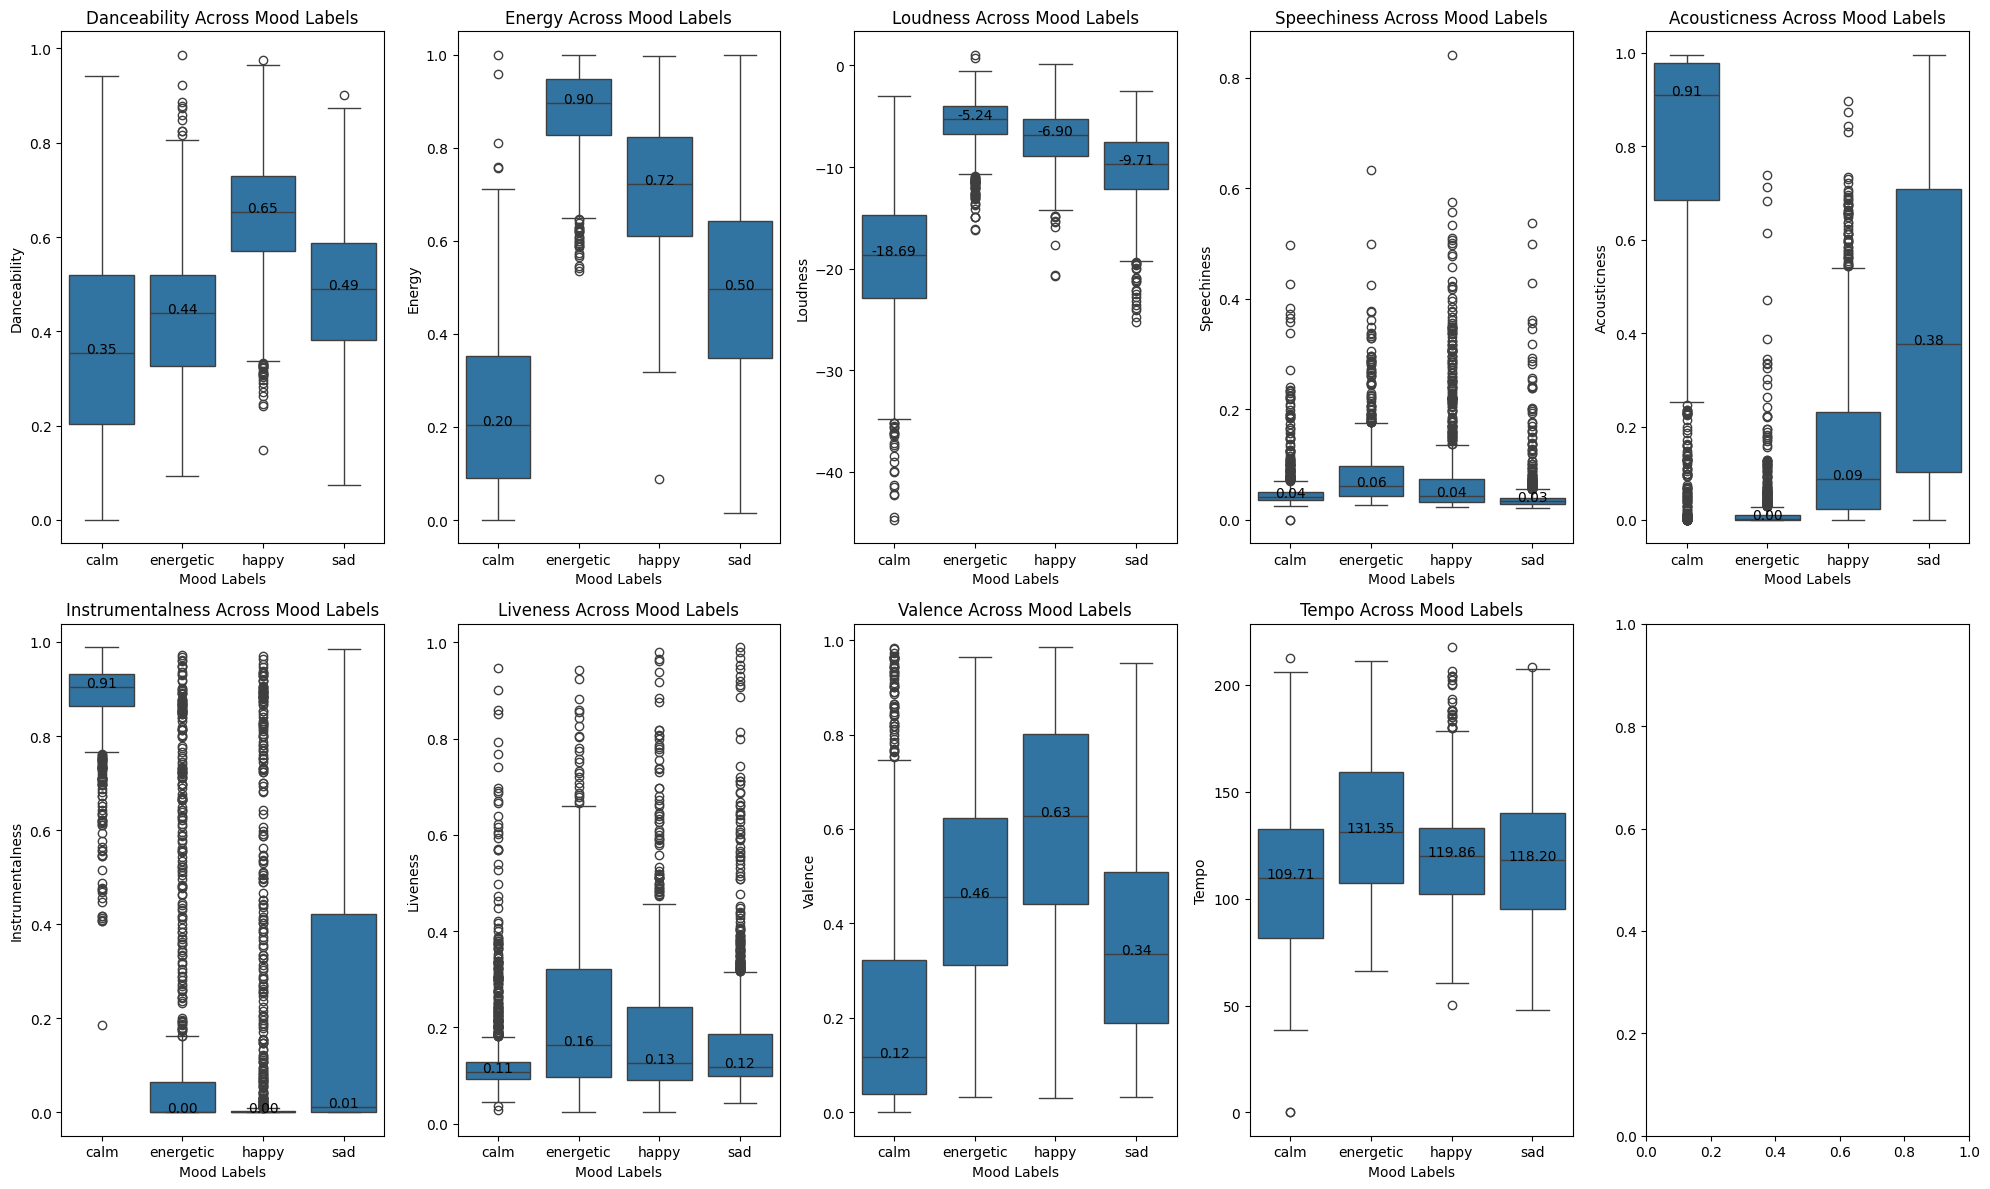

In [7]:
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}

# Map numerical labels to text labels
df['label_text'] = df['labels'].map(label_mapping)

# for feature in audio_features:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df['label_text'], y=df[feature], order=['calm', 'energetic', 'happy', 'sad'])
#     plt.title(f"{feature.capitalize()} Across Mood Labels")
#     plt.xlabel("Mood Labels")
#     plt.ylabel(f"{feature.capitalize()}")

#     # Add median values
#     medians_corrected = df.groupby('label_text')[feature].median()
#     for i, median in enumerate(medians_corrected):
#         plt.text(i, median, f'{median:.2f}', horizontalalignment='center', color='black', fontsize=12)
#     print(medians_corrected)
#     plt.show()


# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharey=False)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each feature and its corresponding subplot
for idx, feature in enumerate(audio_features):
    sns.boxplot(ax=axes[idx], x=df['label_text'], y=df[feature], 
                order=['calm', 'energetic', 'happy', 'sad'])
    axes[idx].set_title(f"{feature.capitalize()} Across Mood Labels")
    axes[idx].set_xlabel("Mood Labels")
    axes[idx].set_ylabel(f"{feature.capitalize()}")

    # Add median values
    medians_corrected = df.groupby('label_text')[feature].median()
    for i, median in enumerate(medians_corrected):
        axes[idx].text(i, median, f'{median:.2f}', horizontalalignment='center', 
                       color='black', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Conclusion
The boxplots indicate distinct patterns of audio feature distributions across mood labels. For example, "instrumentalness" is significantly higher for specific moods, while "energy" and "danceability" show broader overlaps. These trends suggest that certain features may strongly influence mood classification, while others exhibit variability across labels.

- **Danceability:**
    - Happy moods exhibit the highest danceability (median = 0.6525), indicating tracks labeled as "happy" are more rhythmically engaging.
    - Calm moods have the lowest danceability (median = 0.3550), reflecting their laid-back nature.
    - The range of danceability is narrowest for "calm" tracks, suggesting less variation in this feature within calm moods.
- **Energy:**
    - Energetic moods dominate with the highest energy levels (median = 0.895), aligning with their lively characteristics.
    - Calm moods have the lowest energy (median = 0.205), consistent with their relaxed feel.
    - Sad and happy tracks fall in between, with "happy" being notably higher than "sad."
- **Loudness:**
    - Energetic tracks are the loudest (median = -5.2445 dB), matching their high-energy nature.
    - Calm tracks are significantly quieter (median = -18.6855 dB), enhancing their soothing qualities.
    - The difference between the loudness of "happy" and "sad" tracks suggests a moderate increase in energy for "happy" moods.
- **Speechiness:**
    - Energetic tracks have the highest speechiness (median = 0.06150), indicating a greater presence of spoken words.
    - Sad tracks have the least speechiness (median = 0.03350), suggesting fewer vocal interruptions.
    - Speechiness variability is higher in energetic tracks, showing a mix of vocal and instrumental dominance.
- **Acousticness:**
    - Calm tracks are the most acoustic (median = 0.91000), often featuring traditional instruments or minimal electronic effects.
    - Energetic tracks are the least acoustic (median = 0.00193), dominated by electronic and synthetic sounds.
    - "Sad" tracks lean more towards acoustic styles than "happy" ones.
- **Instrumentalness:**
    - Calm tracks have the highest instrumentalness (median = 0.905), often featuring fewer or no vocals.
    - Happy tracks have the lowest instrumentalness (median = 0.000018), emphasizing vocal components.
    - Sad and energetic tracks show moderate instrumentalness, balancing vocals and instrumentation.
- **Liveness:**
    - Energetic tracks have the highest liveness (median = 0.164), often hinting at live performance settings.
    - Calm tracks show the least liveness (median = 0.108), suggesting studio-produced environments.
    - Happy and sad tracks have similar liveness, with slightly more variance in happy tracks.
- **Valence:**
    - Happy tracks score highest on valence (median = 0.6285), reflecting their bright and positive emotional tone.
    - Calm tracks have the lowest valence (median = 0.1175), indicating subdued and mellow moods.
    - Sad tracks have a higher valence than calm ones but lower than energetic and happy tracks.
- **Tempo:**
    - Energetic tracks have the fastest tempo (median = 131.354 BPM), driving their dynamic nature.
    - Calm tracks have the slowest tempo (median = 109.707 BPM), contributing to their relaxing feel.
    - Happy tracks are faster than sad ones, aligning with their cheerful and upbeat characteristics.

# Top 20 Tags in the Dataset

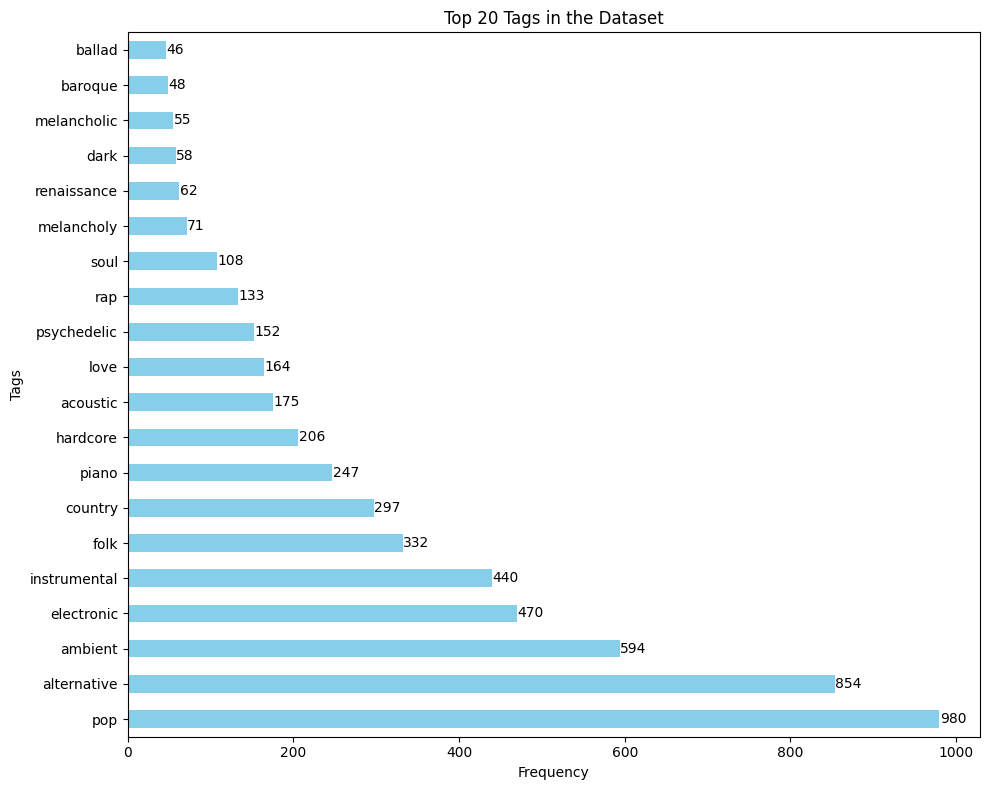

In [8]:
# Count tags and sort
tag_columns = df.columns[18:52]
tag_sums = df[tag_columns].sum().sort_values(ascending=False).head(20)

tag_sums.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 20 Tags in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Tags')

# Annotate counts on the bars
for index, value in enumerate(tag_sums):
    plt.text(value + 0.5, index, str(value), va='center')

plt.tight_layout()
plt.show()

# Conclusion
The most frequent tag is pop, with 980 occurrences, showcasing its dominance in the dataset. Other prevalent tags include alternative with 854 occurrences and ambient with 594 occurrences, reflecting a diversity of genres. In contrast, tags like ballad, with 46 occurrences, represent niche categories.

# Tag Word Cloud

{'country': 297, 'ballad': 46, 'folk': 332, 'alternative': 854, 'pop': 980, 'acoustic': 175, 'soul': 108, 'love': 164, 'electronic': 470, 'instrumental': 440, 'rap': 133, 'jam': 37, 'melancholy': 71, 'melancholic': 55, 'psychedelic': 152, 'ambient': 594, 'piano': 247, 'drama': 12, 'glitch': 20, 'neoclassical': 45, 'dark': 58, 'techno': 38, 'progressive': 35, 'hardcore': 206, 'steampunk': 26, 'cabaret': 20, 'orchestral': 24, 'cello': 17, 'baroque': 48, 'cinematic': 26, 'renaissance': 62, 'chant': 10, 'choral': 10, 'yule': 7}


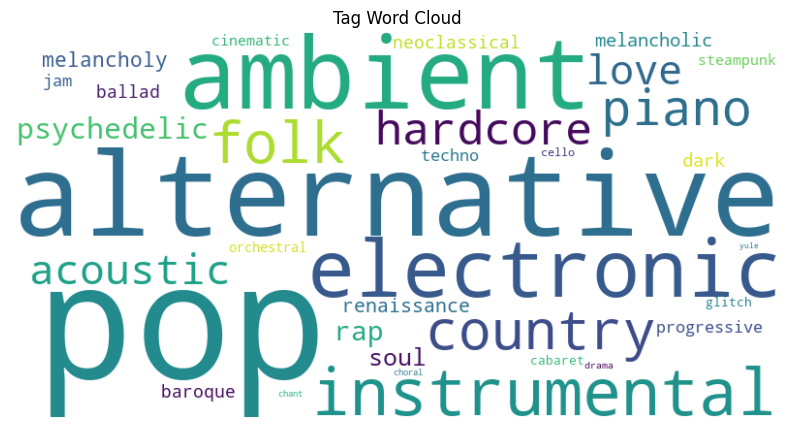

In [9]:
# Generate word frequencies for tags
tag_sums = df[tag_columns].sum()
word_freq = tag_sums.to_dict()
print(word_freq)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Word Cloud')
plt.show()

# Conclusion
The word cloud visually emphasizes the prominence of tags in the dataset. Dominant tags like "pop" and "alternative" stand out due to their high frequency, while tags like "yule" and "chant" are among the smallest, indicating their rarity. This highlights a dataset characterized by popular and diverse genres, with a mix of widely represented and niche categories.

# Average Audio Feature Values per Label

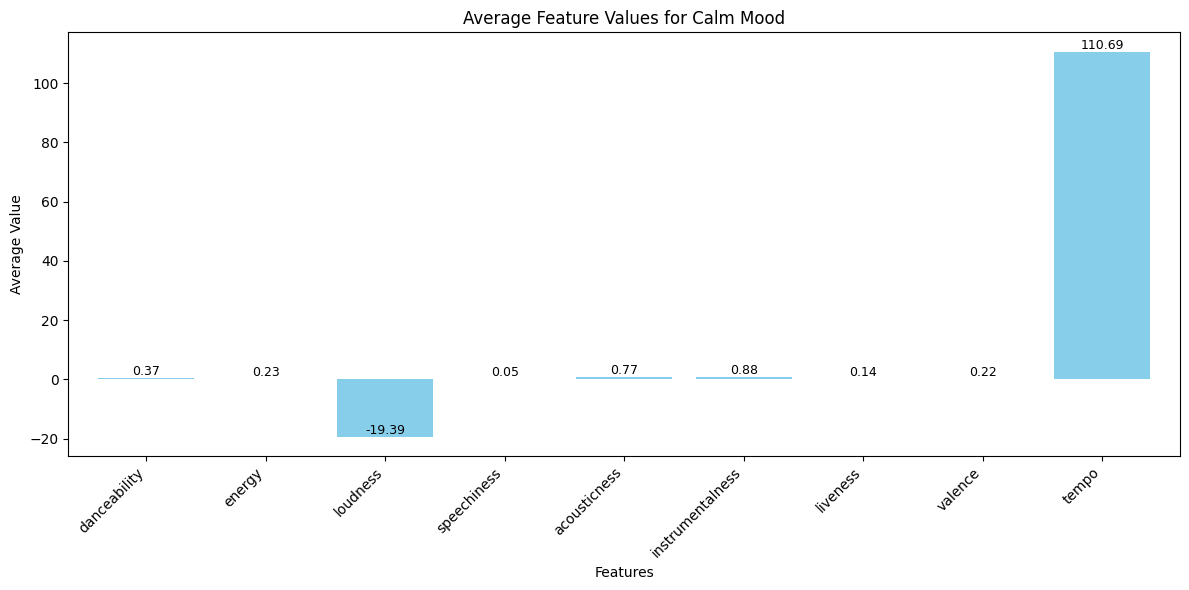

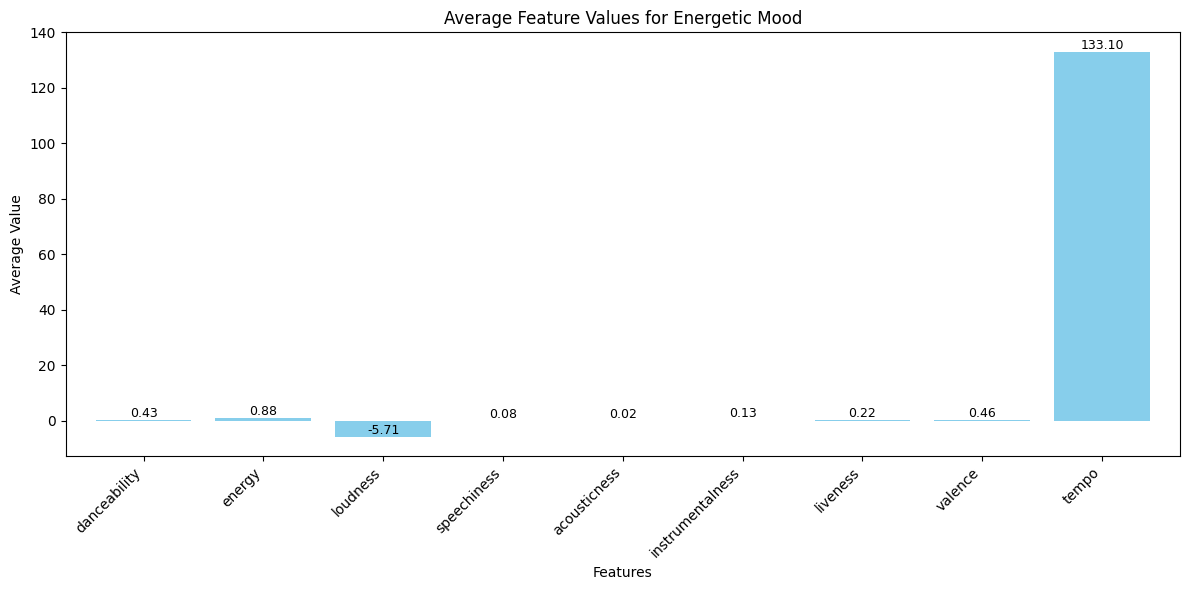

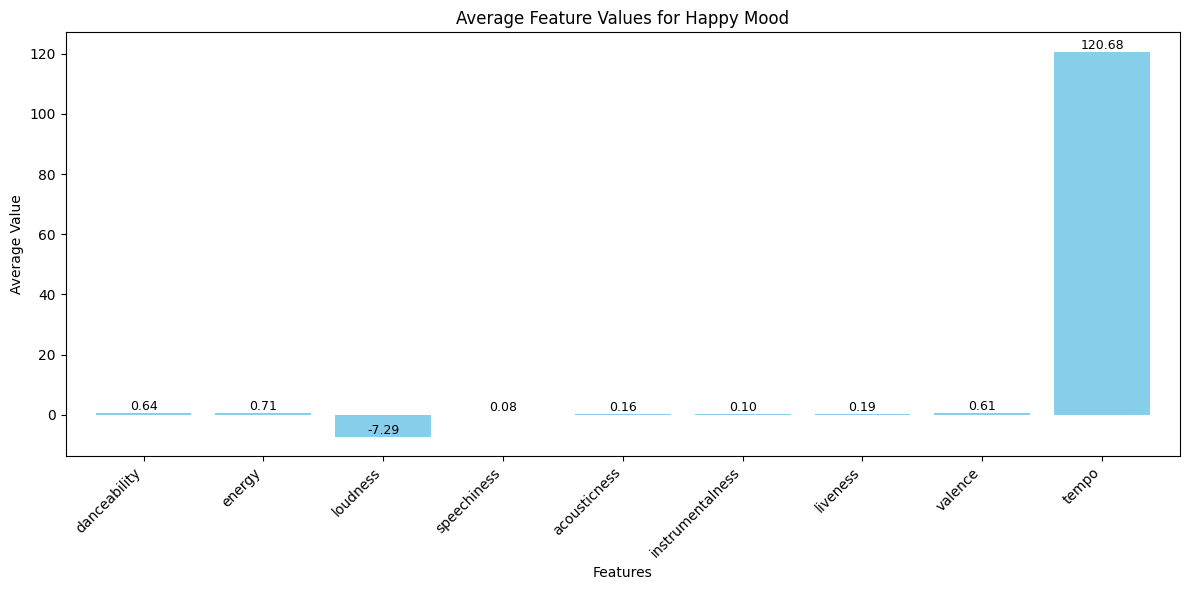

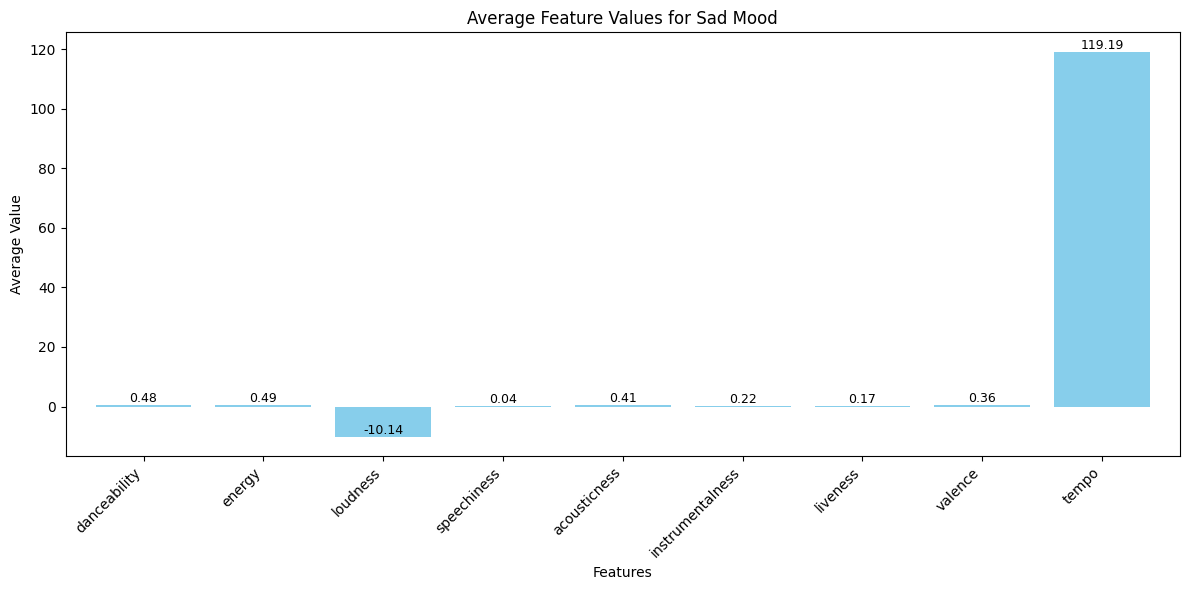

In [10]:
# Calculate mean values for features grouped by label
feature_means = df.groupby(df['label_text'])[audio_features].mean()

# Create individual bar plots for each label
for label in feature_means.index:
    feature_means.loc[label].plot(kind='bar', figsize=(12, 6), color='skyblue', width=0.8)
    plt.title(f'Average Feature Values for {label.capitalize()} Mood')
    plt.xlabel('Features')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
    
    # Annotate the bars with values
    for idx, value in enumerate(feature_means.loc[label]):
        plt.text(idx, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Conclusion
- **Calm:** 
    - Acousticness (average: 0.77) and instrumentalness (average: 0.88) dominate, reflecting the serene and instrumental characteristics.
    - Energy (average: 0.23) and loudness (average: -19.39 dB) are the lowest among all moods, indicating the tranquil nature of this category.
    - Valence (average: 0.22) is the lowest, consistent with the peaceful tone.
    - The tempo is moderate (average: 110.69 BPM), fitting the calming mood.
- **Energetic:**
    - Energy (average: 0.88) and loudness (average: -5.71 dB) are the highest, showcasing the vibrant nature.
    - Danceability (average: 0.43) and valence (average: 0.46) highlight upbeat, high-energy characteristics.
    - Acousticness (average: 0.02) is extremely low, emphasizing synthetic or electronic sounds.
    - Tempo (average: 133.10 BPM) is the fastest, underscoring the dynamic nature of this mood.
- **Happy:**
    - Danceability (average: 0.64) and valence (average: 0.61) are the highest, reflecting cheerful and lively tracks.
    - Energy (average: 0.71) and tempo (average: 120.68 BPM) contribute to the upbeat nature.
    - Acousticness (average: 0.16) is moderately low, indicating a mix of acoustic and synthetic influences.
    - Instrumentalness (average: 0.10) is among the lowest, showing a strong preference for vocal tracks.
- **Sad:**
    - Valence (average: 0.36) is moderate, higher than Calm but lower than Happy, reflecting bittersweet or reflective tones.
    - Energy (average: 0.49) and loudness (average: -10.14 dB) are moderate, highlighting a blend of subdued and dynamic tracks.
    - Acousticness (average: 0.41) and instrumentalness (average: 0.22) suggest a balance of vocals and instruments.
    - The tempo (average: 119.19 BPM) is steady, fitting for introspective tracks.

# Audio Features Pair Relationships

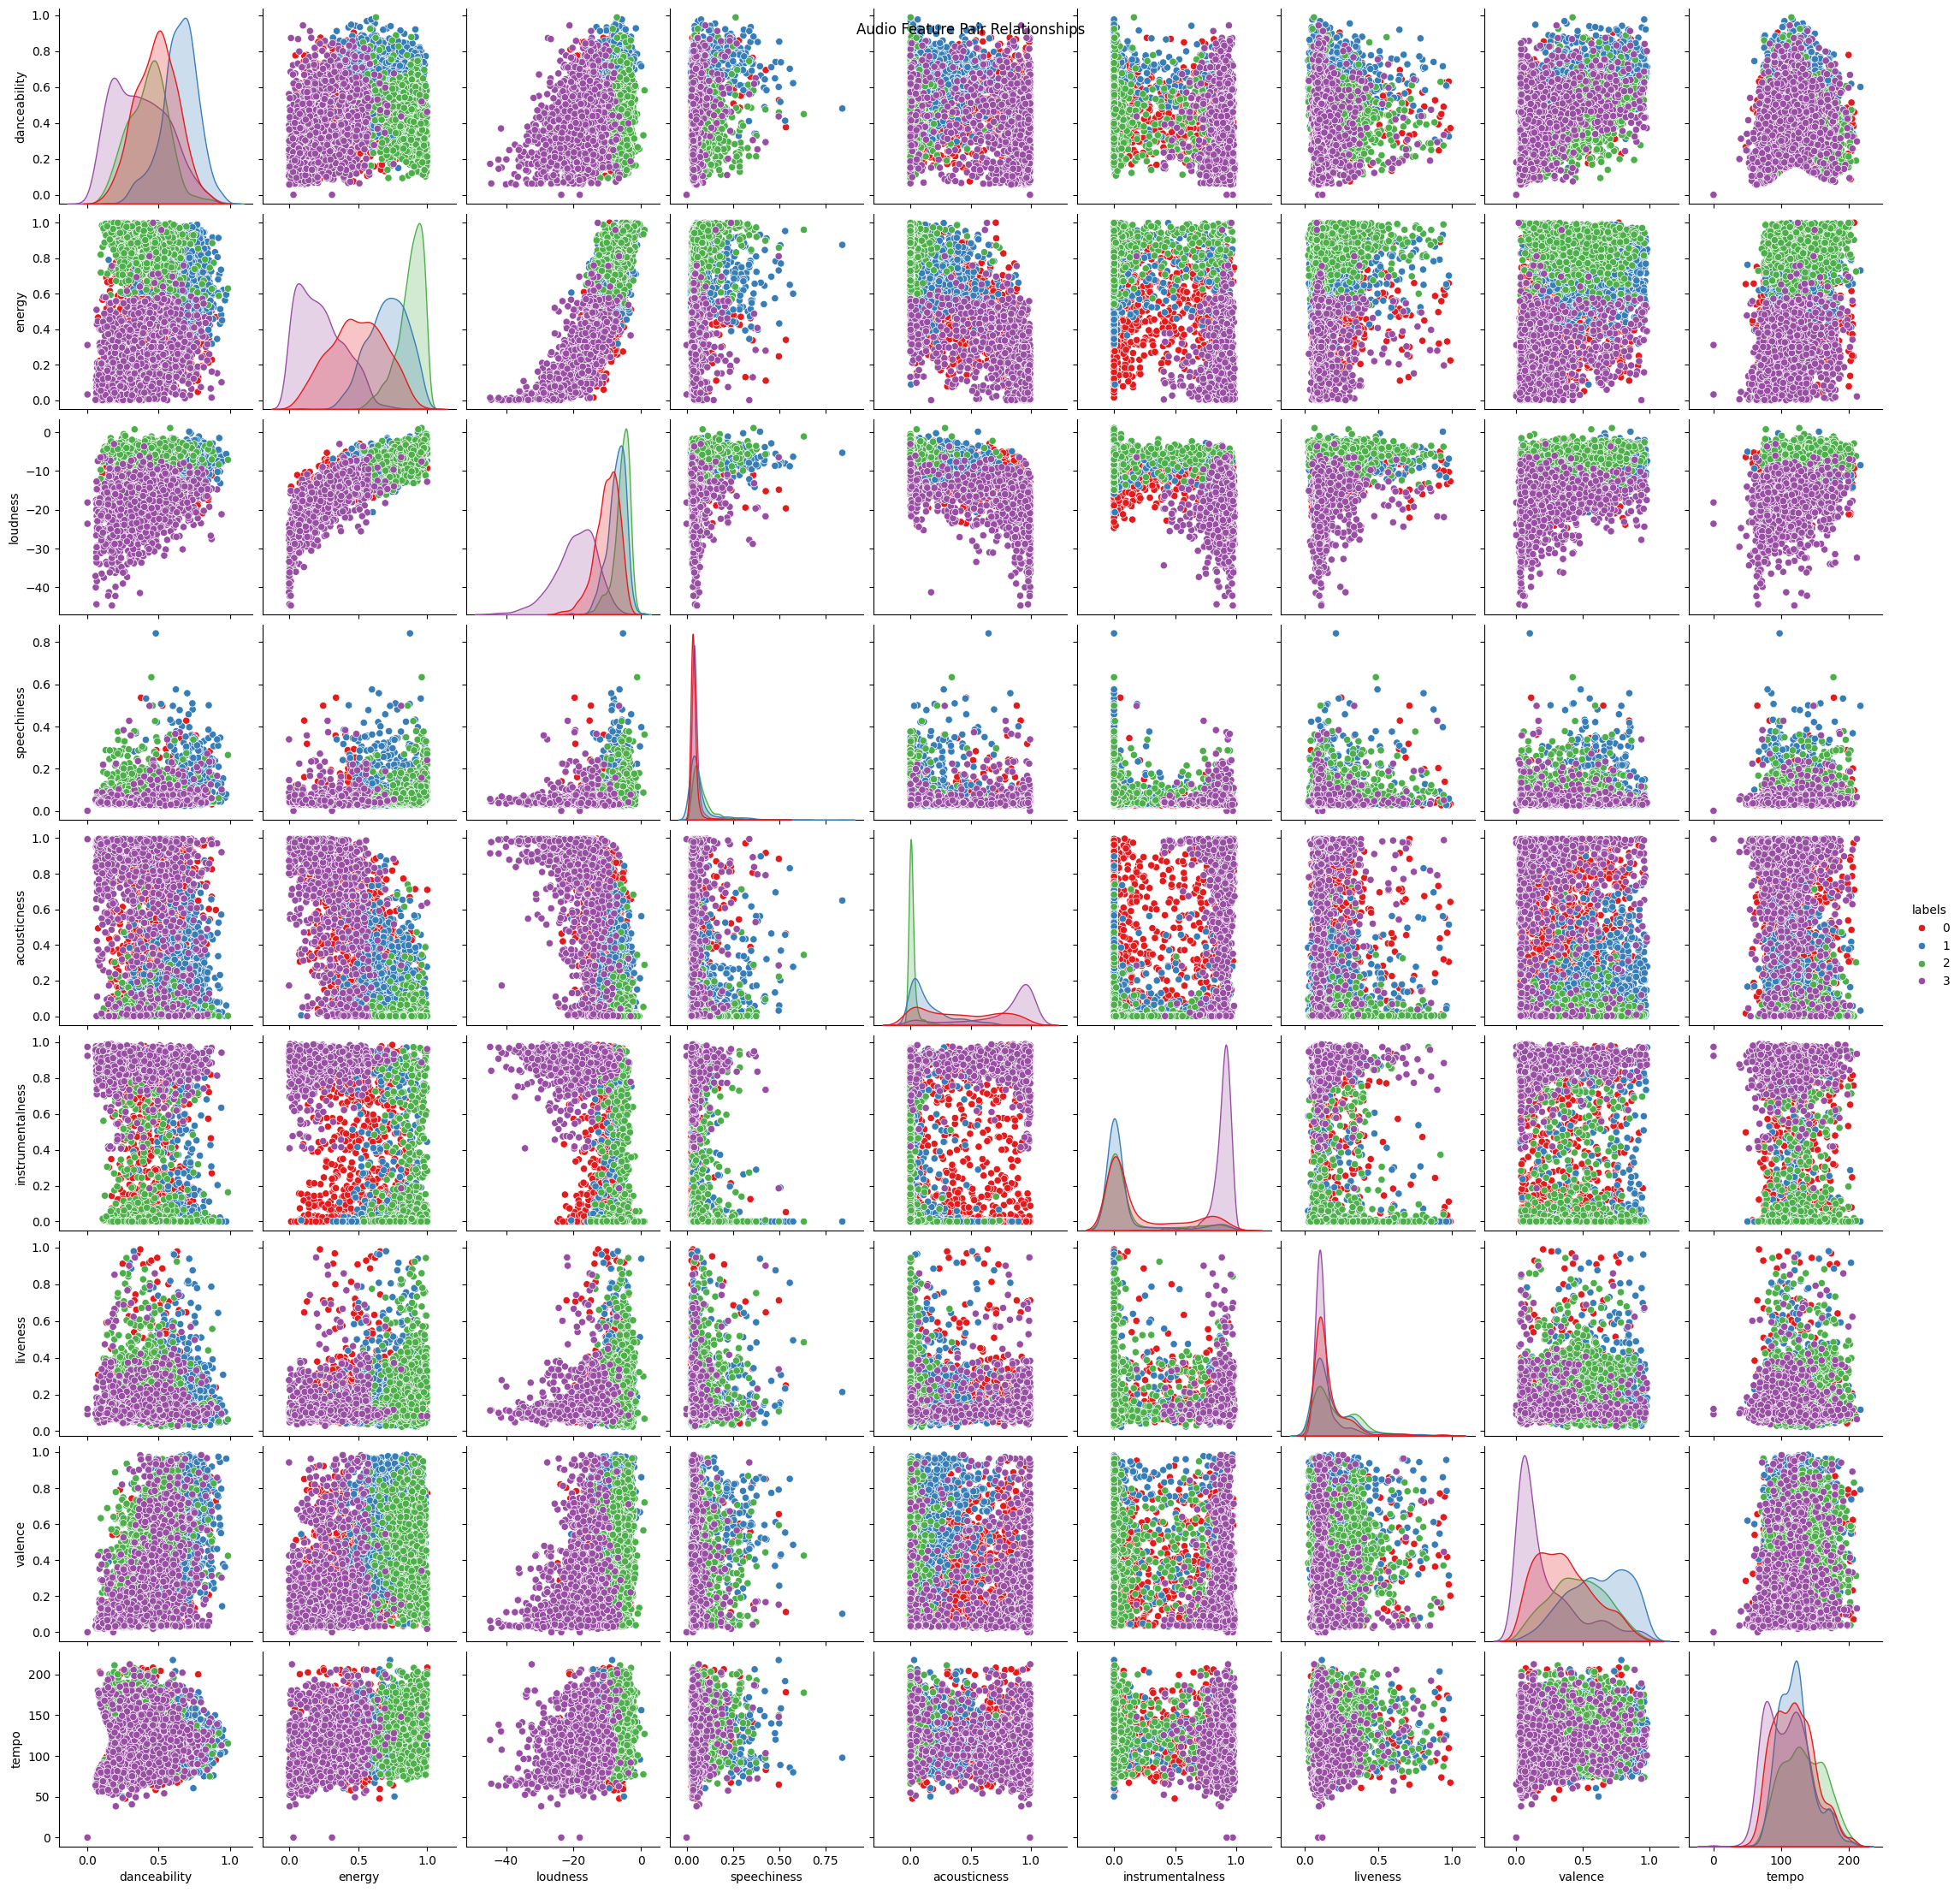

In [11]:
sns.pairplot(df, vars=audio_features, hue='labels', palette='Set1')
plt.suptitle('Audio Feature Pair Relationships')
plt.show()

# Conclusion
The pairplot illustrates relationships between audio features across mood labels ("sad," "happy," "energetic," "calm"). Distinct clusters in features like "energy" vs. "valence" or "danceability" suggest differentiable patterns between moods. Overlaps in some dimensions, such as "tempo" and "liveness," highlight shared characteristics across labels, indicating complex interdependencies among features.

### 1. Danceability
- **Energy vs. Danceability**: Higher energy correlates with higher danceability, with **"energetic"** moods clustering at high values.
- **Valence vs. Danceability**: Higher valence tracks, such as **"happy"** moods, align with higher danceability, emphasizing positivity.
- **Acousticness vs. Danceability**: Inverse relationship; **"calm"** and **"sad"** tracks exhibit high acousticness and low danceability.

### 2. Energy
- **Energy vs. Loudness**: Strong positive correlation, with **"energetic"** and **"happy"** moods clustering in high-energy, high-loudness regions.
- **Energy vs. Valence**: Higher energy aligns with higher valence, particularly for **"happy"** and **"energetic"** tracks.
- **Energy vs. Acousticness**: Inverse correlation; low acousticness characterizes high-energy moods like **"energetic."**

### 3. Loudness
- **Loudness vs. Valence**: Tracks with higher loudness lean toward higher valence, emphasizing positivity in **"happy"** and **"energetic"** moods.
- **Loudness vs. Instrumentalness**: Higher loudness correlates with lower instrumentalness, distinguishing **"calm"** moods from others.

### 4. Valence
- **Valence vs. Tempo**: Tracks with higher valence, such as **"happy"** moods, tend to have moderate to high tempos.
- **Valence vs. Acousticness**: Tracks with high acousticness trend toward lower valence, typical of **"calm"** and **"sad"** moods.

### 5. Acousticness
- **Acousticness vs. Instrumentalness**: Strong positive correlation; **"calm"** tracks dominate this space, emphasizing natural and instrumental soundscapes.
- **Acousticness vs. Valence**: Tracks with high acousticness trend toward lower valence, typical of **"calm"** and **"sad"** moods.

### 6. Speechiness
- **Speechiness vs. Acousticness**: Tracks with high acousticness generally exhibit low speechiness, aligning with **"calm"** and **"sad"** moods.
- **Speechiness vs. Energy**: Tracks with moderate speechiness are often more energetic, particularly in **"energetic"** moods.

### 7. Tempo
- **Tempo vs. Valence**: Higher valence tracks tend to favor moderate to fast tempos, seen in **"happy"** moods.
- **Tempo vs. Energy**: Tempo shows minimal correlation with energy, though higher tempos are common in **"energetic"** tracks.

### 8. Instrumentalness
- **Instrumentalness vs. Valence**: Higher instrumentalness aligns with lower valence, emphasizing **"calm"** and **"sad"** moods.
- **Instrumentalness vs. Acousticness**: Strong positive correlation; instrumental tracks are also highly acoustic.

### 9. Liveness
- **Liveness vs. Energy**: Overlap across moods, with no distinct relationship to energy levels.
- **Liveness vs. Acousticness**: Tracks with high acousticness lean toward lower liveness, typical of studio-produced **"calm"** tracks.

## Insights and Applications
- Features like **energy**, **valence**, and **danceability** provide robust distinctions between moods, aiding in mood-based classification.
- Overlaps in features like **tempo** and **liveness** suggest these attributes alone cannot distinguish moods but can complement other features.
- **Acousticness** and **instrumentalness** strongly characterize **"calm"** and **"sad"** moods, while **danceability**, **energy**, and **valence** dominate **"happy"** and **"energetic"** moods.

# Tag Distribution by Mood Labels

            country  ballad  folk  alternative  pop  acoustic  soul  love  \
label_text                                                                  
calm             25       0    68           29   43        39     6    23   
energetic        55       5    10          335  247         3     8    33   
happy           120      14    47          240  395        33    52    45   
sad              97      27   207          250  295       100    42    63   

            electronic  instrumental  ...  steampunk  cabaret  orchestral  \
label_text                            ...                                   
calm               251           314  ...          3        0          20   
energetic           40            18  ...          0        0           0   
happy              103            30  ...          5        0           0   
sad                 76            78  ...         18       20           4   

            cello  baroque  cinematic  renaissance  chant  choral  yule  


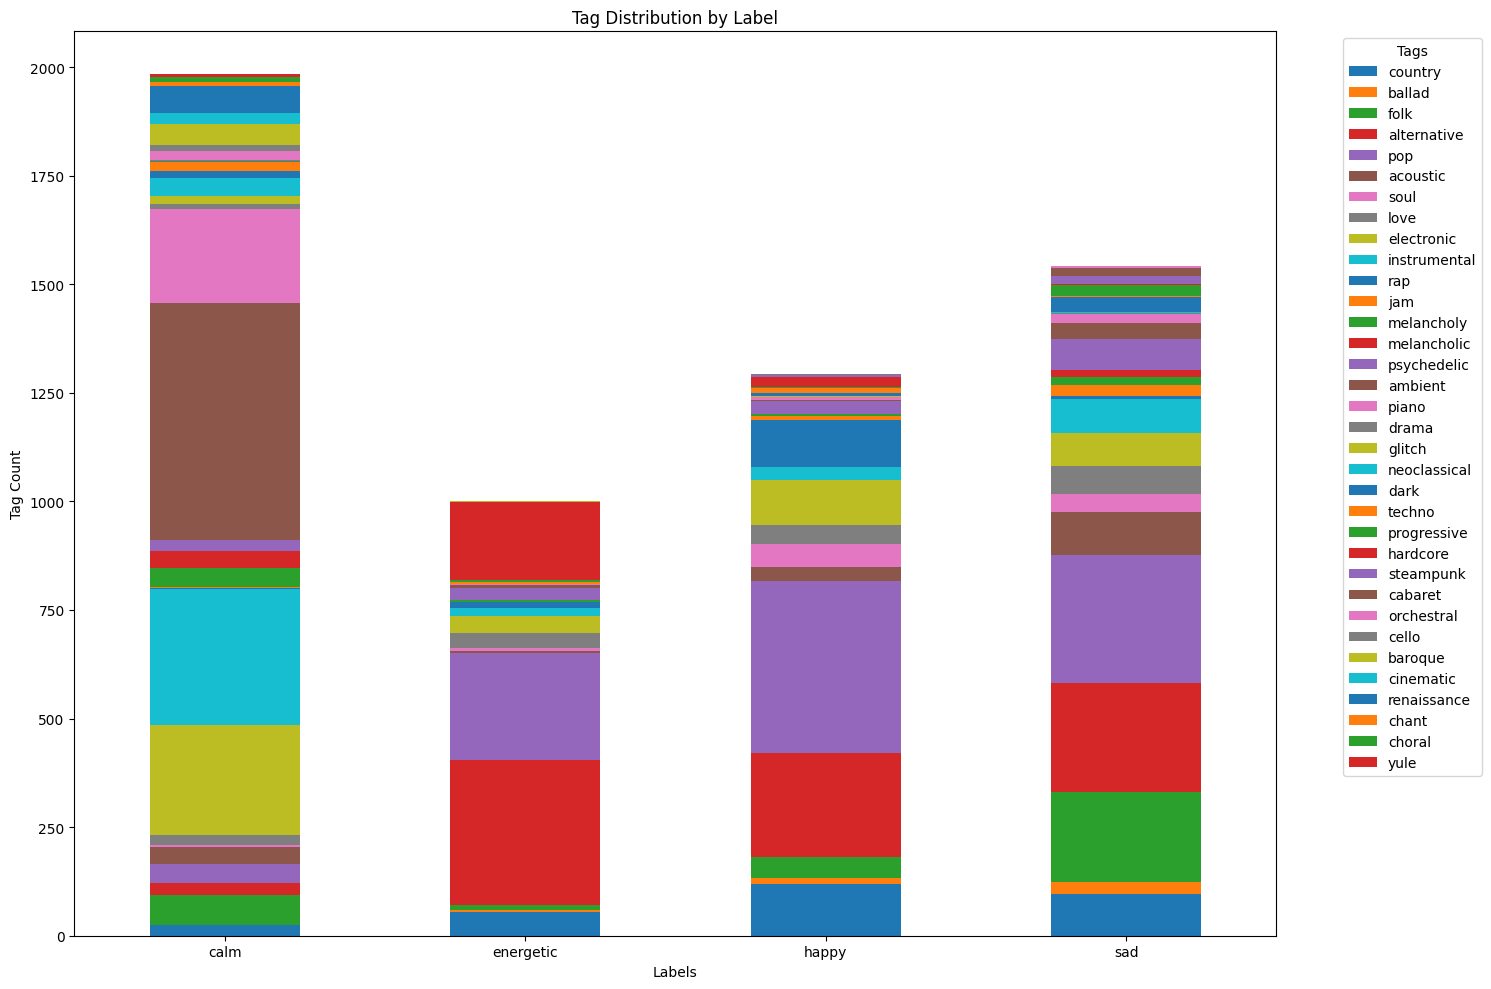

In [12]:
# Update the label mapping for boxplots
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}
df['label_text'] = df['labels'].map(label_mapping)

# Aggregate tag counts by label
tag_counts_by_label = df.groupby(df['label_text'])[tag_columns].sum()
print(tag_counts_by_label)

tag_counts_by_label.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Tag Distribution by Label')
plt.xlabel('Labels')
plt.ylabel('Tag Count')
plt.xticks(rotation=0) 
plt.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Conclusion

## Calm Mood
- Dominated by tags such as **"instrumental"** (314 occurrences) and **"electronic"** (251 occurrences), highlighting its preference for instrumental and ambient sounds.
- Other prominent tags include **"folk"** (68) and **"acoustic"** (39), reflecting a natural and serene musical style.
- Tags like **"pop"** (43) are less frequent, indicating a lower association with mainstream styles.

## Energetic Mood
- Tags such as **"pop"** (247) and **"alternative"** (335) dominate, showcasing its dynamic and versatile nature.
- Least associated with **"instrumental"** (18) and **"acoustic"** (3), emphasizing a focus on synthetic or high-energy compositions.
- Moderate representation of **"electronic"** (40), adding diversity to its energetic character.

## Happy Mood
- Highly associated with **"pop"** (395) and **"alternative"** (240), reflecting its bright and mainstream appeal.
- Moderate occurrences of **"love"** (45) and **"soul"** (52), enhancing its emotional and cheerful undertones.
- Features lower occurrences of **"instrumental"** (30) and **"electronic"** (103), focusing on vocal-rich tracks.

## Sad Mood
- Strongly associated with **"folk"** (207), **"alternative"** (250), and **"pop"** (295), reflecting a melancholic yet diverse musical spectrum.
- High counts for **"acoustic"** (100) and **"love"** (63), emphasizing introspective and emotive elements.
- Moderate representation of **"instrumental"** (78) and **"electronic"** (76), adding depth to its soundscape.

## Insights
The tag distribution reveals distinct patterns for each mood, enabling better mood classification and understanding of musical characteristics. **Calm** and **sad** moods emphasize natural and instrumental sounds, while **happy** and **energetic** moods lean toward vocal and synthetic elements.


# Top 10 Tags for Each Mood Label

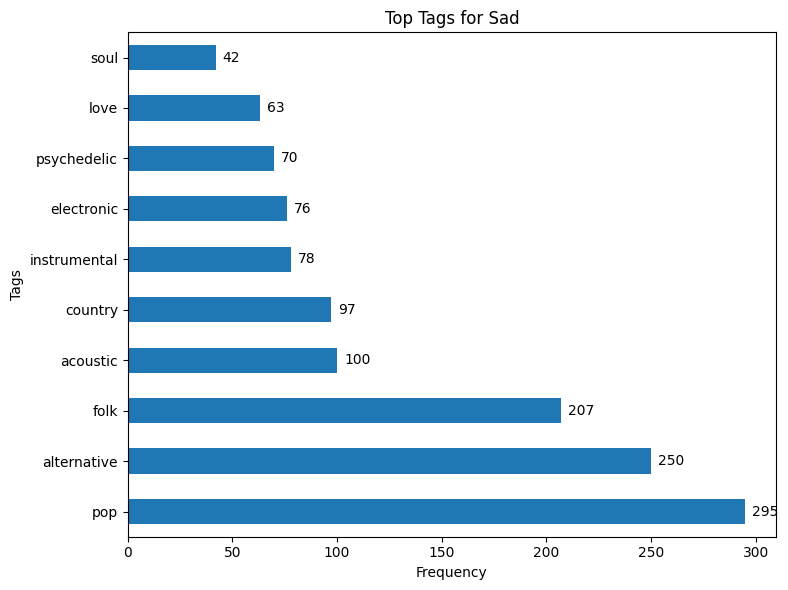

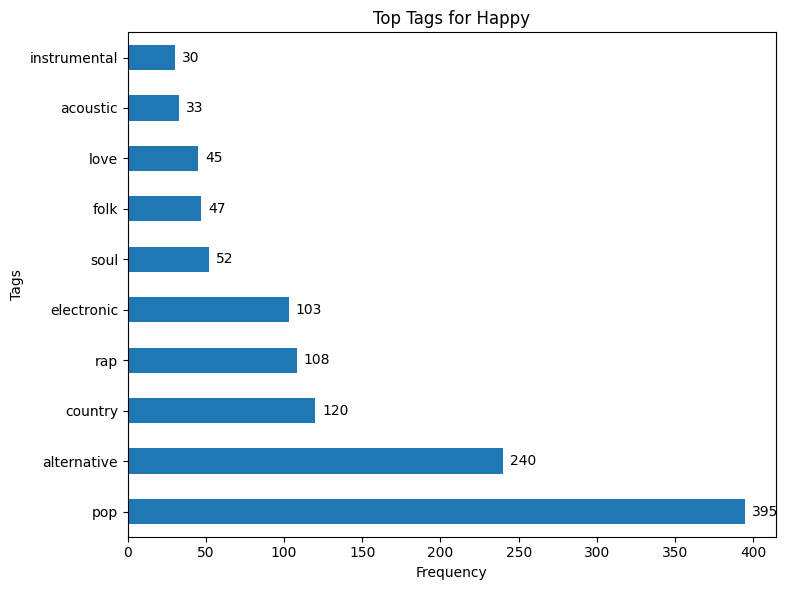

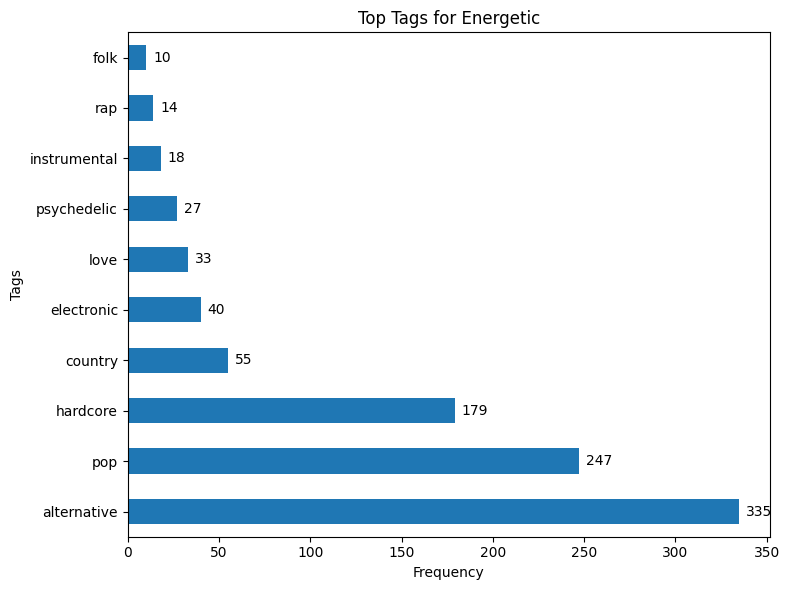

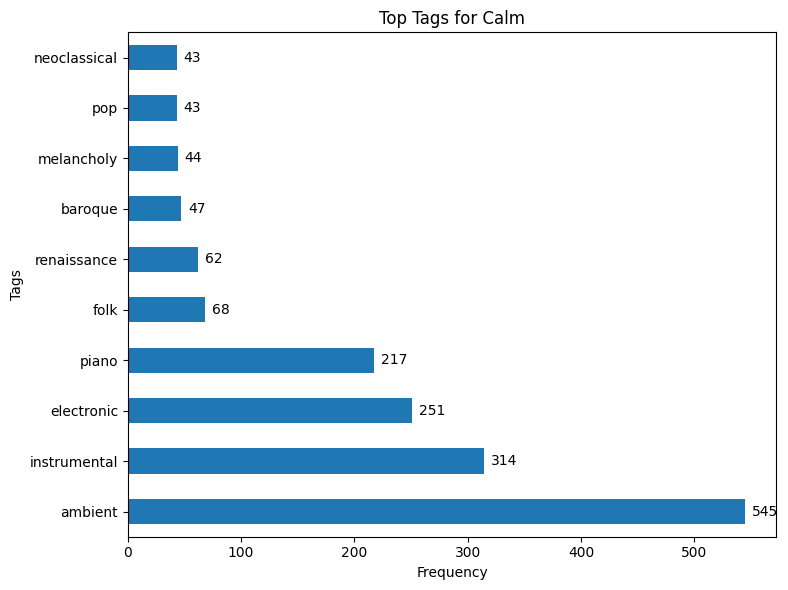

In [13]:
# Plot top 10 tags for each label
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}
df['label_text'] = df['labels'].map(label_mapping)
top_tags_by_label = {}
for label in df['label_text'].unique():
    top_tags = df[df['label_text'] == label][tag_columns].sum().sort_values(ascending=False).head(10)
    top_tags_by_label[label] = top_tags

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(8, 6))
    top_tags.plot(kind='barh', ax=ax)
    
    # Add annotations for each bar
    for index, value in enumerate(top_tags):
        ax.annotate(f'{value}', xy=(value, index), xytext=(5, 0), textcoords='offset points', va='center')

    ax.set_title(f'Top Tags for {label.capitalize()}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Tags')
    
    plt.tight_layout()
    plt.show()

# Conclusion
## Sad Mood
- The most prominent tags are **"pop"** (295) and **"alternative"** (250), indicating a blend of mainstream and alternative melancholic tracks.
- **"Folk"** (207) and **"acoustic"** (100) reflect a natural, introspective style.
- Tags like **"psychedelic"** (70) and **"love"** (63) emphasize emotional and introspective elements.

## Happy Mood
- Dominated by **"pop"** (395) and **"alternative"** (240), highlighting its bright and energetic character.
- Tags like **"rap"** (108) and **"electronic"** (103) emphasize modern and upbeat trends.
- Emotional undertones are reflected in **"soul"** (52) and **"love"** (45), adding warmth to the mood.

## Energetic Mood
- Highly associated with **"alternative"** (335) and **"pop"** (247), reflecting dynamic and versatile music styles.
- **"Hardcore"** (179) stands out, indicating high-intensity tracks.
- Other tags like **"electronic"** (40) and **"psychedelic"** (27) add diversity to this high-energy mood.

## Calm Mood
- Strongly characterized by **"ambient"** (545) and **"instrumental"** (314), showcasing its serene and tranquil nature.
- **"Piano"** (217) and **"electronic"** (251) add a gentle, melodic touch.
- Classical influences are evident in **"renaissance"** (62) and **"baroque"** (47), along with subtle melancholic tones in **"melancholy"** (44).

## Insights
- **Sad** and **calm** moods focus more on natural and emotional tags like **"folk"**, **"acoustic"**, and **"instrumental."**
- **Happy** and **energetic** moods feature modern and vibrant tags like **"pop"**, **"rap"**, and **"electronic."**
- Classical influences like **"baroque"** and **"renaissance"** are unique to calm moods, while high-intensity tags like **"hardcore"** are exclusive to energetic moods.

# Top Correlated Tags with Mood Labels

In [14]:
# # Correlation of tags with labels
# tag_label_correlation = df[tag_columns].corrwith(df['labels']).sort_values()

# # Plot top negatively correlated tags
# plt.figure(figsize=(8, 6))
# negative_corr = tag_label_correlation.head(10)
# negative_corr.plot(kind='barh', color='red')
# for index, value in enumerate(negative_corr):
#     plt.text(value, index, f"{value:.2f}", va='center', ha='left', fontsize=9)
# plt.title('Top Negatively Correlated Tags with Labels')
# plt.xlabel('Correlation')
# plt.ylabel('Tags')
# plt.tight_layout()
# plt.show()

# # Plot top positively correlated tags
# plt.figure(figsize=(8, 6))
# positive_corr = tag_label_correlation.tail(10)
# positive_corr.plot(kind='barh', color='green')
# for index, value in enumerate(positive_corr):
#     plt.text(value, index, f"{value:.2f}", va='center', ha='left', fontsize=9)
# plt.title('Top Positively Correlated Tags with Labels')
# plt.xlabel('Correlation')
# plt.ylabel('Tags')
# plt.tight_layout()
# plt.show()

# Conclusion
## Negative Correlations
Tags with negative correlations are associated with calmer or more introspective moods like **"sad"** and **"calm."** These tags, such as **folk**, **acoustic**, and **ballad**, reflect traditional, emotional, and natural characteristics, often emphasizing slower tempos and less energy.

## Positive Correlations
Tags with positive correlations align with more dynamic and vibrant moods like **"happy"** and **"energetic."** These tags, including **ambient**, **electronic**, and **instrumental**, represent modern, high-energy, and experimental musical characteristics, emphasizing liveliness and richness in sound.

## Insights
- Negative correlations indicate a preference for traditional and serene elements, characteristic of introspective moods.
- Positive correlations highlight vibrant, energetic, and modern attributes that dominate upbeat moods.

This analysis underscores the relationship between musical attributes and mood classifications.

# Total Tags Per Mood Label

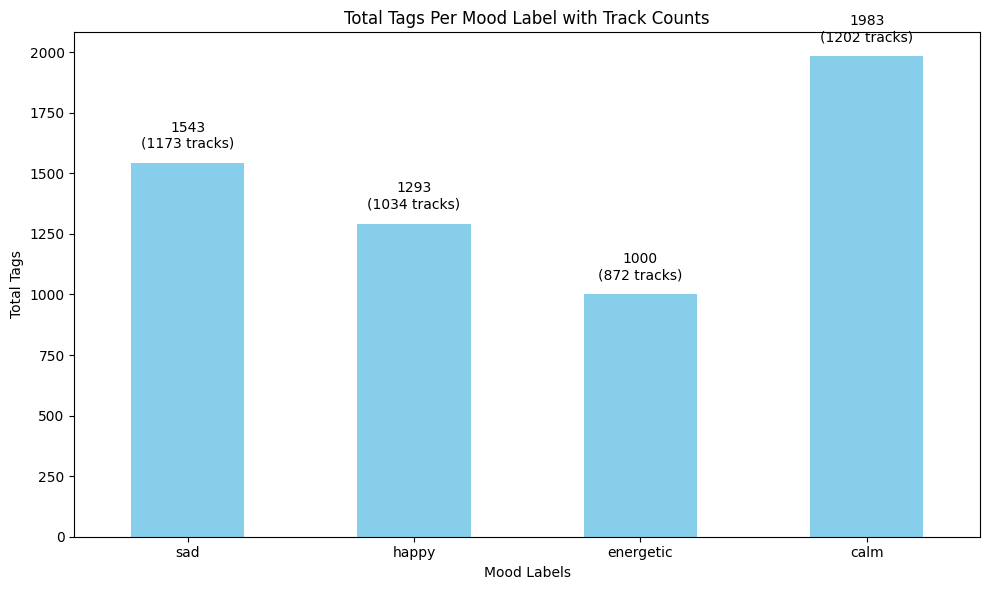

In [15]:
# Mapping from numbers to labels
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}

# Count tracks per label
label_counts = df['labels'].value_counts()

# Sum the number of tags marked as '1' for each label
tags_per_label = df.groupby('labels')[tag_columns].sum().sum(axis=1)

# Combine total tags and track counts for better labeling
tags_per_label_df = pd.DataFrame({
    'Label': tags_per_label.index.map(label_mapping),
    'Total Tags': tags_per_label.values,
    'Track Count': label_counts.loc[tags_per_label.index].values
})

# Plot the total tags per label with track counts included
plt.figure(figsize=(10, 6))
tags_per_label_df.set_index('Label')['Total Tags'].plot(kind='bar', color='skyblue')
for idx, value in enumerate(tags_per_label_df['Total Tags']):
    plt.text(idx, value + 50, f"{value}\n({tags_per_label_df['Track Count'].iloc[idx]} tracks)", 
             ha='center', va='bottom', fontsize=10)
plt.title('Total Tags Per Mood Label with Track Counts')
plt.xlabel('Mood Labels')
plt.ylabel('Total Tags')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Conclusion
## Sad
- **Total Tags**: Highest among all moods.
- **Track Count**: Moderately high, reflecting a significant association of diverse tags with sad moods.
- This suggests that sad tracks are tagged with a variety of attributes, possibly due to the complex emotional and acoustic characteristics of this mood.

## Happy
- **Total Tags**: Second-highest.
- **Track Count**: The highest, indicating a large number of tracks associated with this mood.
- The substantial tagging reflects the vibrant and diverse nature of happy music, which likely spans multiple genres and styles.

## Energetic
- **Total Tags**: Relatively lower compared to sad and happy moods.
- **Track Count**: Moderate, showing a balance between the number of tracks and their tagging.
- Energetic tracks are likely tagged with more specific and high-energy attributes, leading to a more focused tagging pattern.

## Calm
- **Total Tags**: The lowest among all moods.
- **Track Count**: Lowest as well.
- This indicates a simpler tagging structure for calm tracks, emphasizing specific, serene attributes rather than a broad variety.

---

## Overall Insights
- The **sad** and **happy** moods dominate in total tags, suggesting greater diversity and complexity in their attributes.
- **Calm** tracks are more minimalist in tagging, while **energetic** tracks show specificity in their attributes.
- The number of tags correlates with the diversity and emotional complexity of the associated mood, providing insights into the richness of musical characteristics across different labels.

# Most Prevalent Tags Across Tracks

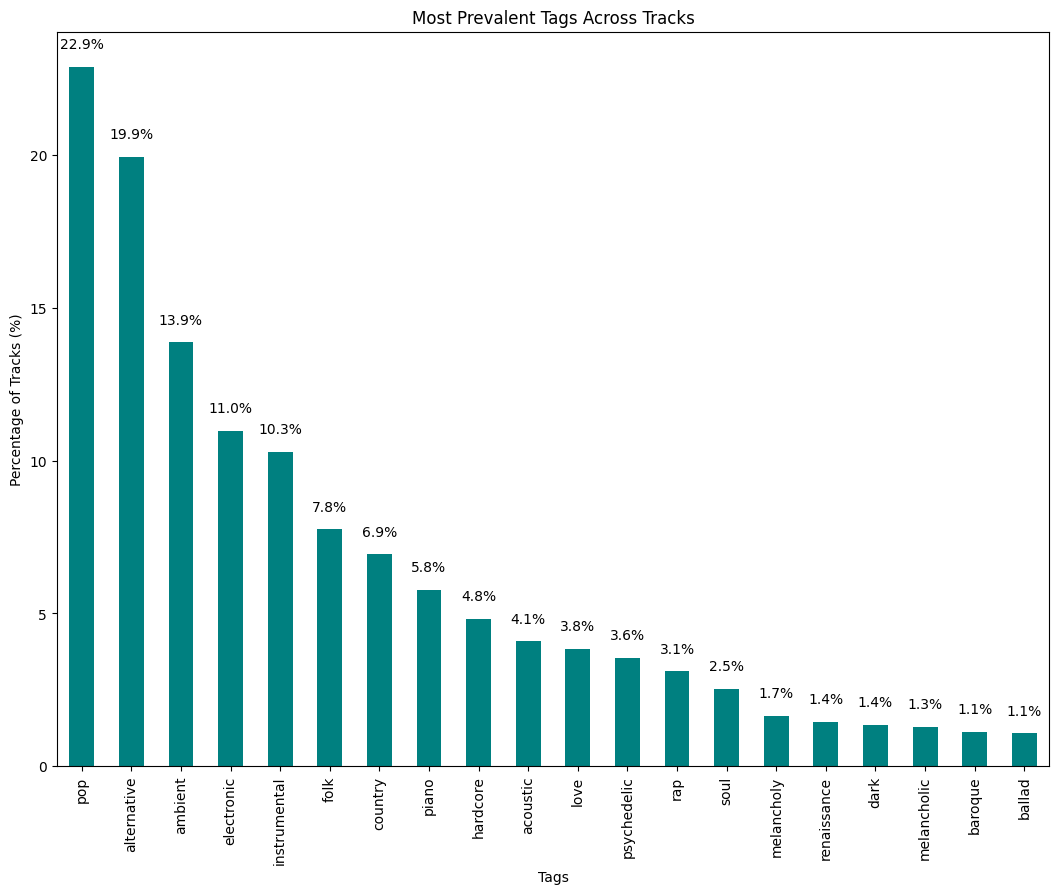

In [16]:
# Calculate prevalence of each tag
tag_prevalence = df[tag_columns].sum() / len(df) * 100

# Plot most prevalent tags with percentage annotations
most_prevalent_tags = tag_prevalence.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
most_prevalent_tags.plot(kind='bar', color='teal')
plt.title('Most Prevalent Tags Across Tracks')
plt.xlabel('Tags')
plt.ylabel('Percentage of Tracks (%)')

# Annotate bars with percentage values
for idx, value in enumerate(most_prevalent_tags):
    plt.text(idx, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=10)

# Add padding and adjust layout
plt.tight_layout(pad=2.0)  # Adjust padding to prevent clipping
plt.subplots_adjust(left=0.15, top=1.1)  # Adjust margins manually if needed

plt.show()

# Conclusion
The graph highlights the tags most frequently associated with tracks in the dataset. The top tags (e.g., pop, alternative, and electronic) occur in a substantial percentage of tracks, reflecting their broad applicability across various moods and genres. This prevalence indicates the dataset's emphasis on mainstream and versatile musical characteristics, with a mix of traditional (e.g., folk) and modern (e.g., electronic) elements.

# Log-Scaled Feature Variance by Mood Label

        danceability    energy   loudness  speechiness  acousticness  \
labels                                                                 
0           0.021472  0.038974  13.073184     0.001623      0.101656   
1           0.016420  0.020526   7.445665     0.007961      0.031056   
2           0.019760  0.008836   6.011275     0.004143      0.004206   
3           0.037577  0.028139  38.923684     0.001520      0.083091   

        instrumentalness  liveness   valence        tempo  
labels                                                     
0               0.098373  0.018228  0.046478   916.180583  
1               0.057666  0.023618  0.050330   644.115890  
2               0.069035  0.026031  0.044398   970.232031  
3               0.007283  0.010214  0.055416  1101.242551  


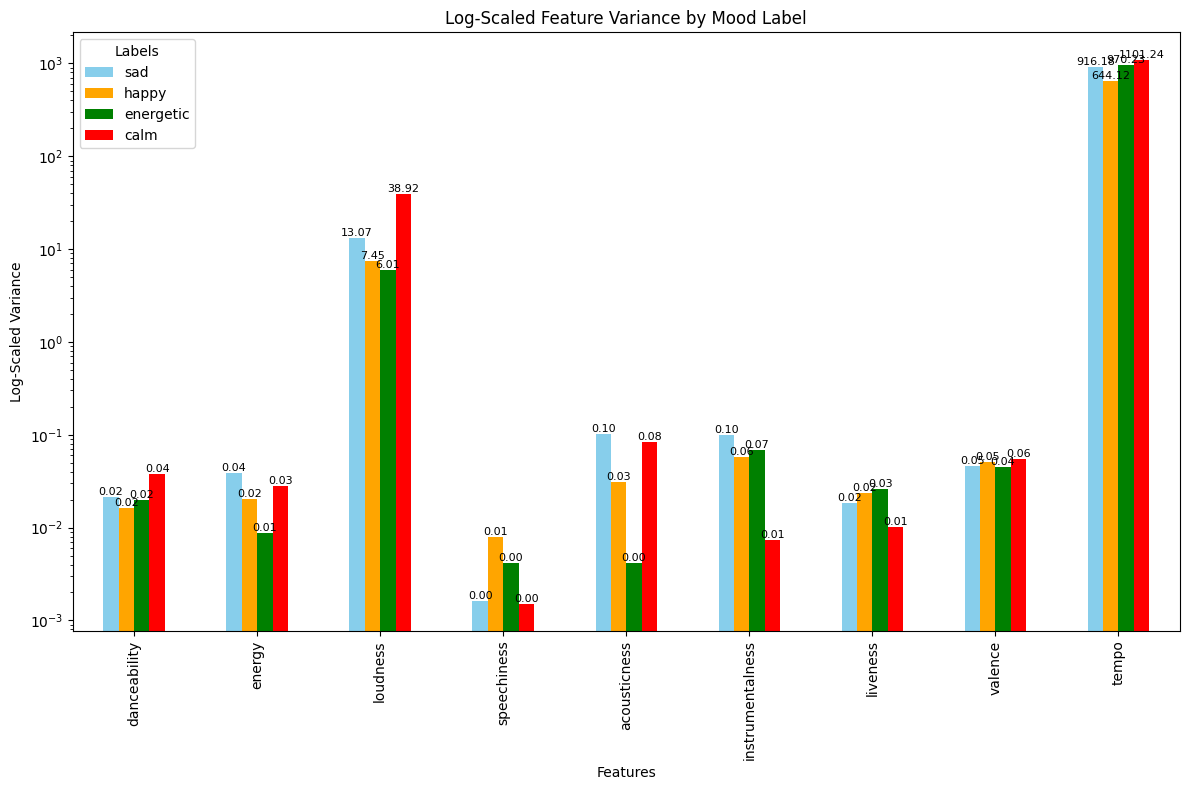

In [17]:
# Calculate variance per label
variance_by_label = df.groupby('labels')[audio_features].var()
print(variance_by_label)
# Mapping from numbers to labels
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}

# Replace numerical labels with text for plotting
variance_by_label.index = variance_by_label.index.map(label_mapping)

# Create a bar plot with annotations
ax = variance_by_label.T.plot(kind='bar', figsize=(12, 8), logy=True, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Log-Scaled Feature Variance by Mood Label')
plt.xlabel('Features')
plt.ylabel('Log-Scaled Variance')
plt.legend(title='Labels', loc='upper left')

# Annotate the bars with values
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        value = bar.get_height()
        if not np.isnan(value):  # Avoid NaN values
            ax.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}',
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Conclusion

## 1. Danceability
- **Highest Variance**: **Calm** (**0.0376**) – Calm tracks exhibit varied rhythmic appeal.
- **Lowest Variance**: **Happy** (**0.0164**) – Happy tracks are more consistent in their rhythmic attributes.

## 2. Energy
- **Highest Variance**: **Sad** (**0.0390**) – Sad tracks display diverse energy levels, from low to moderately high.
- **Lowest Variance**: **Energetic** (**0.0088**) – Energetic tracks maintain consistent high-energy attributes.

## 3. Loudness
- **Highest Variance**: **Calm** (**38.92**) – Calm tracks range widely from very quiet to moderately loud.
- **Lowest Variance**: **Energetic** (**6.01**) – Energetic tracks maintain consistently high loudness.

## 4. Speechiness
- **Highest Variance**: **Happy** (**0.0080**) – Happy tracks range from instrumental to moderately vocal.
- **Lowest Variance**: **Calm** (**0.0015**) – Calm tracks are consistently low in speechiness.

## 5. Acousticness
- **Highest Variance**: **Sad** (**0.1017**) – Sad tracks range from highly acoustic to non-acoustic.
- **Lowest Variance**: **Energetic** (**0.0042**) – Energetic tracks are consistently low in acoustic elements.

## 6. Instrumentalness
- **Highest Variance**: **Sad** (**0.0984**) – Sad tracks range from vocal-heavy to purely instrumental.
- **Lowest Variance**: **Calm** (**0.0073**) – Calm tracks are more uniform in their instrumental attributes.

## 7. Liveness
- **Highest Variance**: **Energetic** (**0.0260**) – Energetic tracks include both studio and live recordings.
- **Lowest Variance**: **Calm** (**0.0102**) – Calm tracks are more consistently studio-recorded.

## 8. Valence
- **Highest Variance**: **Calm** (**0.0554**) – Calm tracks range widely in emotional positivity.
- **Lowest Variance**: **Energetic** (**0.0444**) – Energetic tracks have consistent emotional tones.

## 9. Tempo
- **Highest Variance**: **Calm** (**1101.24**) – Calm tracks exhibit a wide range of tempos.
- **Lowest Variance**: **Happy** (**644.12**) – Happy tracks maintain more uniform pacing.

---

# Overall Insights
- **Sad** tracks exhibit the highest variance in **energy**, **acousticness**, and **instrumentalness**, reflecting their emotional and musical diversity.
- **Energetic** tracks maintain low variance in most features, emphasizing consistency in their high-energy nature.
- **Calm** tracks show significant variance in **loudness**, **valence**, and **tempo**, indicating broad diversity in these features.
- **Happy** tracks are consistent in **danceability** and **tempo**, aligning with their vibrant and uniform characteristics.


# Top 10 Tag Co-occurrence Matrix

Top 10 Tag Co-occurrence Matrix:
              ambient    pop  piano  acoustic  electronic  love  neoclassical
electronic      153.0    0.0    0.0       0.0         0.0   0.0           0.0
alternative       0.0  126.0    0.0       0.0        50.0   0.0           0.0
instrumental     92.0    0.0   68.0       0.0         0.0   0.0           0.0
ambient           0.0    0.0   83.0       0.0         0.0   0.0           0.0
folk              0.0    0.0    0.0      68.0         0.0   0.0           0.0
pop               0.0    0.0    0.0       0.0        55.0  46.0           0.0
piano             0.0    0.0    0.0       0.0         0.0   0.0          38.0


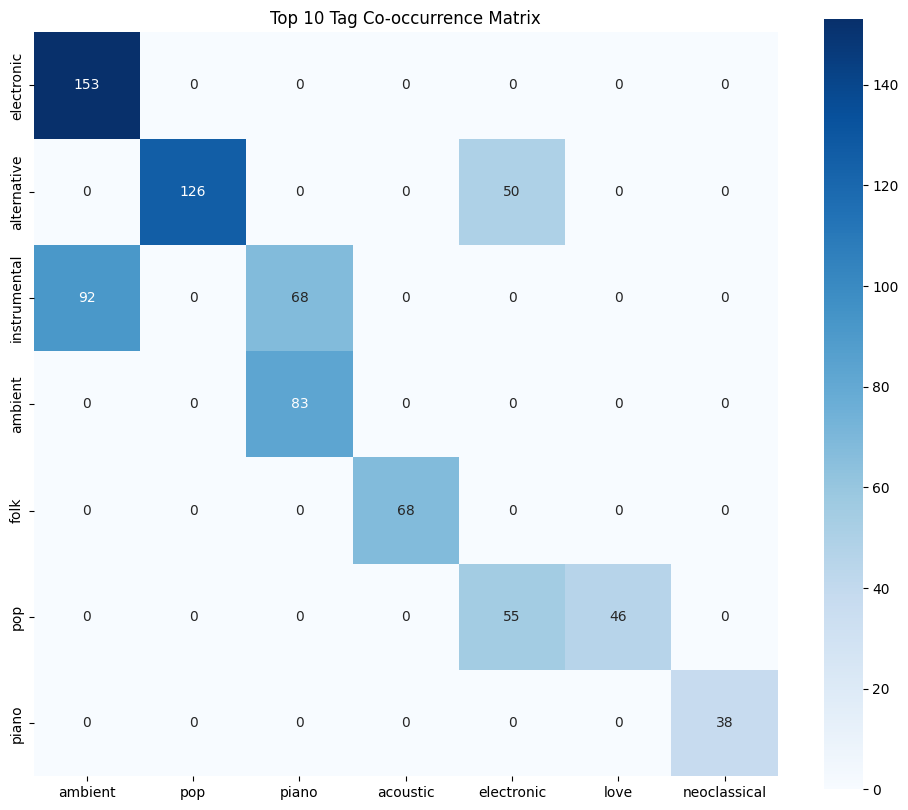

In [18]:
# Calculate co-occurrence matrix
co_occurrence = df[tag_columns].T.dot(df[tag_columns])

# Flatten the co-occurrence matrix and sort by values
co_occurrence_flat = co_occurrence.where(
    ~np.tril(np.ones(co_occurrence.shape)).astype(bool)  # Ignore lower triangle and diagonal
).stack().sort_values(ascending=False)

# Get top 10 co-occurrences
top_10_co_occurrences = co_occurrence_flat.head(10)

# Display as a matrix-like structure
top_10_matrix = pd.DataFrame(index=top_10_co_occurrences.index.map(lambda x: x[0]).unique(),
                             columns=top_10_co_occurrences.index.map(lambda x: x[1]).unique())

for (tag1, tag2), value in top_10_co_occurrences.items():
    top_10_matrix.loc[tag1, tag2] = value

# Replace NaN with 0 for clarity
top_10_matrix.fillna(0, inplace=True)

# Print matrix
print("Top 10 Tag Co-occurrence Matrix:")
print(top_10_matrix)

# Plot heatmap with values annotated
plt.figure(figsize=(12, 10))
sns.heatmap(top_10_matrix, cmap='Blues', square=True, cbar=True, annot=True, fmt=".0f")
plt.title('Top 10 Tag Co-occurrence Matrix')
plt.show()

# Conclusion
The heatmap visualizes the top 10 pairs of tags that frequently co-occur across tracks:
## Top Co-occurrences
1. **Electronic** with **Ambient** (**153 occurrences**):  
   These tags often appear together, reflecting their association with modern and expansive soundscapes.
2. **Alternative** with **Pop** (**126 occurrences**):  
   Highlights the versatility of these mainstream and genre-blurring tags.
3. **Instrumental** with **Piano** (**68 occurrences**):  
   Indicates their strong connection in calm and classical styles.

## Insights
- The high co-occurrence between **electronic** and **ambient** tags shows their shared role in creating rich, atmospheric tracks.
- The pairing of **alternative** and **pop** suggests a blend of contemporary and mainstream influences across multiple moods.
- The relationship between **instrumental** and **piano** reflects their dominance in serene and classical music.

# Correlation of Preview Audio Features with Labels

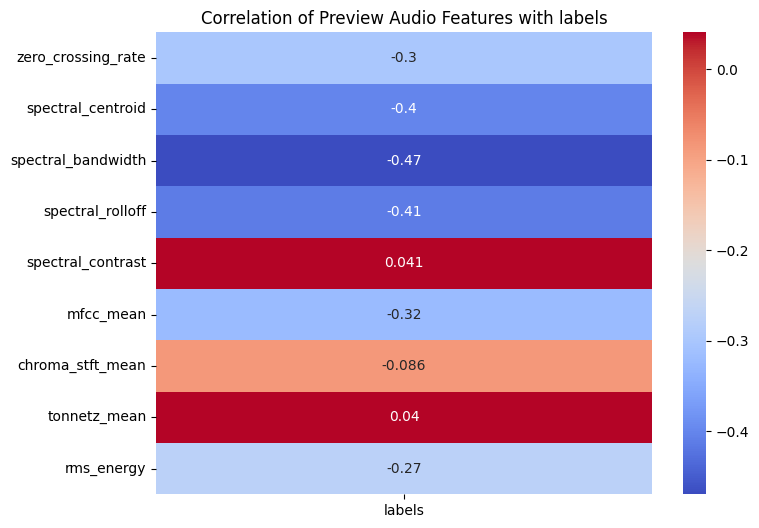

In [7]:
target_column = 'labels'

preview_audio_features = ['zero_crossing_rate', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'spectral_contrast', 'mfcc_mean',
                          'chroma_stft_mean', 'tonnetz_mean', 'rms_energy']
# Calculate correlation
correlation_matrix = df[preview_audio_features + [target_column]].corr()

correlation_with_target = correlation_matrix.loc[preview_audio_features, [target_column]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Correlation of Preview Audio Features with {target_column}')
plt.show()

# Conclusion

## Negative Correlations
- **Spectral Bandwidth** (**-0.47**) and **Spectral Rolloff** (**-0.41**) exhibit the strongest negative correlations, indicating these features are more prominent in lower mood labels such as "calm" and "sad."
- **RMS Energy** (**-0.27**) shows a moderate negative correlation, suggesting it aligns with quieter and less dynamic tracks often associated with calmer moods.
- Other features, such as **Spectral Centroid** (**-0.40**) and **MFCC Mean** (**-0.32**), also contribute to distinguishing calmer moods.

## Positive Correlations
- **Spectral Contrast** (**0.04**) and **Tonnetz Mean** (**0.04**) exhibit weak positive correlations, indicating limited association with higher mood labels such as "happy" and "energetic."
- These features are less impactful for identifying vibrant or energetic moods.

---

## Insights
- **Key Features for Calmer Moods**: Features like **Spectral Bandwidth**, **Spectral Rolloff**, and **RMS Energy** are pivotal in identifying calmer or sadder moods due to their negative correlation.
- **Limited Positive Correlations**: Energy-related features show minimal to weak positive correlations with vibrant or energetic moods.
- This analysis aids in prioritizing audio features for mood-based music classification, especially for distinguishing calmer moods from energetic or happy ones.

# Distribution of Preview Audio Features in the Dataset

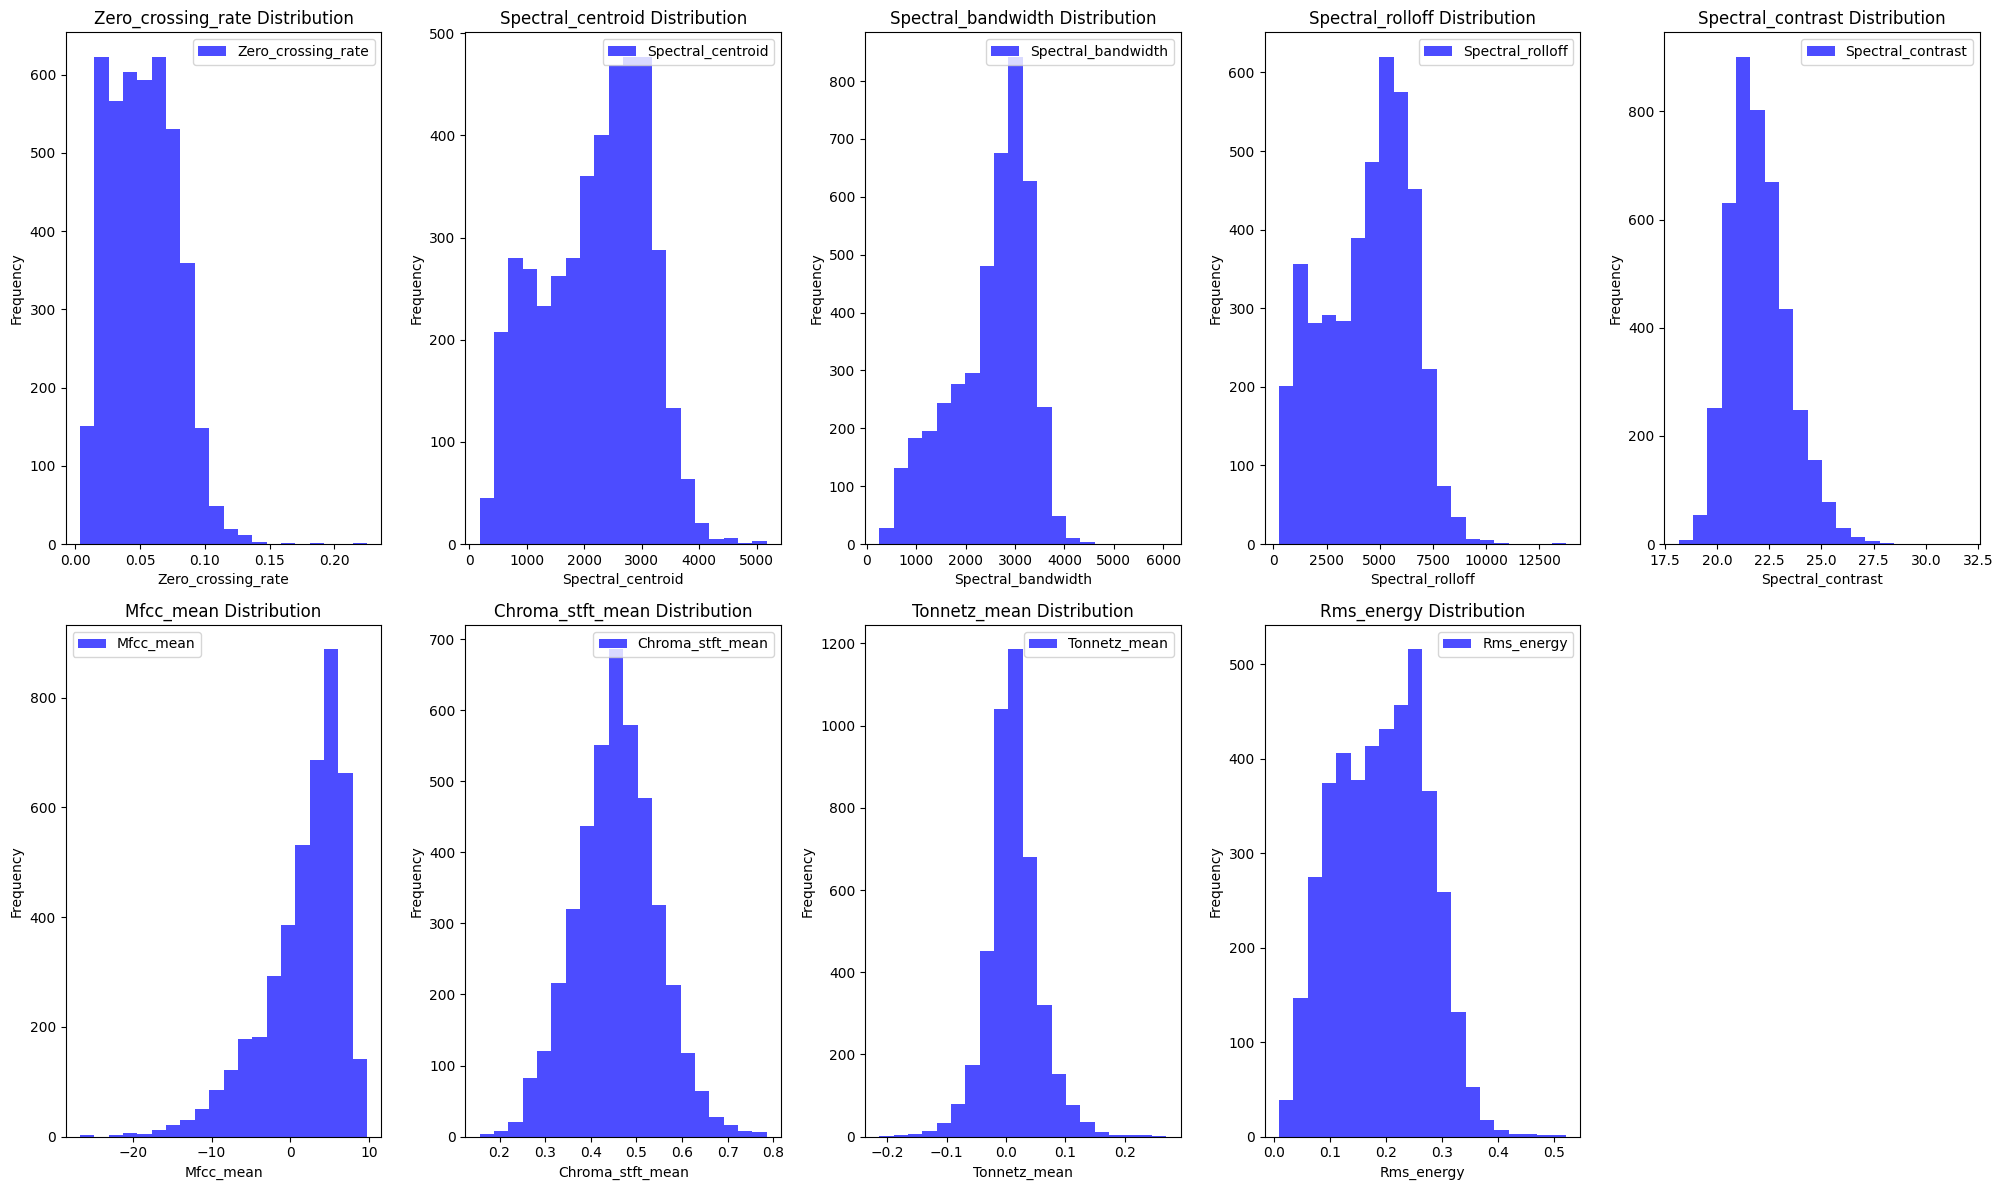

In [9]:
# Analyze skewness for each feature and plot histograms
# skewness_analysis = {}

# for feature in preview_audio_features:
#     df[feature].plot(kind='hist', bins=20, alpha=0.7, color='blue', label=feature.capitalize())
#     plt.title(f"{feature.capitalize()} Distribution")
#     plt.xlabel(f"{feature.capitalize()}")
#     plt.ylabel('Frequency')
#     plt.show()
    
#     # Calculate skewness
#     skewness = df[feature].skew()
#     skewness_analysis[feature] = skewness
# print(skewness_analysis)

# Define the number of rows and columns for the subplot grid
n_rows, n_cols = 2, 5  # Adjust based on the number of features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()  # Flatten the grid to iterate over the axes easily

# Plot each feature in a separate subplot
for idx, feature in enumerate(preview_audio_features):
    axes[idx].hist(df[feature], bins=20, alpha=0.7, color='blue', label=feature.capitalize())
    axes[idx].set_title(f"{feature.capitalize()} Distribution")
    axes[idx].set_xlabel(feature.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

# Remove empty subplots if the number of features is less than the grid size
for idx in range(len(audio_features), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Conclusion
## 1. Zero Crossing Rate
- **Skewness**: **0.40** (slightly right-skewed).
- The distribution leans slightly toward lower values, with a small tail on the higher end.

## 2. Spectral Centroid
- **Skewness**: **-0.22** (slightly left-skewed).
- The values are slightly concentrated toward the higher range, indicating a bias toward tracks with higher brightness.

## 3. Spectral Bandwidth
- **Skewness**: **-0.67** (moderately left-skewed).
- Tracks tend to have higher spectral bandwidth, indicative of a broader range of frequencies.

## 4. Spectral Rolloff
- **Skewness**: **-0.23** (slightly left-skewed).
- The distribution indicates a slight concentration of tracks with higher frequencies rolling off.

## 5. Spectral Contrast
- **Skewness**: **0.72** (moderately right-skewed).
- Higher spectral contrast is more frequent, suggesting a prominence of tracks with dynamic frequency changes.

## 6. MFCC Mean
- **Skewness**: **-1.26** (highly left-skewed).
- The distribution shows a strong bias toward higher values, common in tracks with rich spectral content.

## 7. Chroma STFT Mean
- **Skewness**: **0.08** (approximately symmetric).
- The values are evenly distributed, reflecting consistency across tracks.

## 8. Tonnetz Mean
- **Skewness**: **0.38** (slightly right-skewed).
- A small bias toward lower harmonic content with a mild tail on the higher side.

## 9. RMS Energy
- **Skewness**: **0.06** (approximately symmetric).
- The energy levels are balanced, with no significant bias toward high or low values.

---

# Overall Insights
- Features like **MFCC Mean** and **Spectral Bandwidth** exhibit notable skewness, indicating specific tendencies in the dataset.
- Features such as **RMS Energy** and **Chroma STFT Mean** are nearly symmetric, reflecting consistency in these attributes across tracks.
- Skewness analysis helps identify dominant trends in audio features, aiding in feature selection and preprocessing for mood classification tasks.

# Variations in Preview Audio Features Across Mood Labels

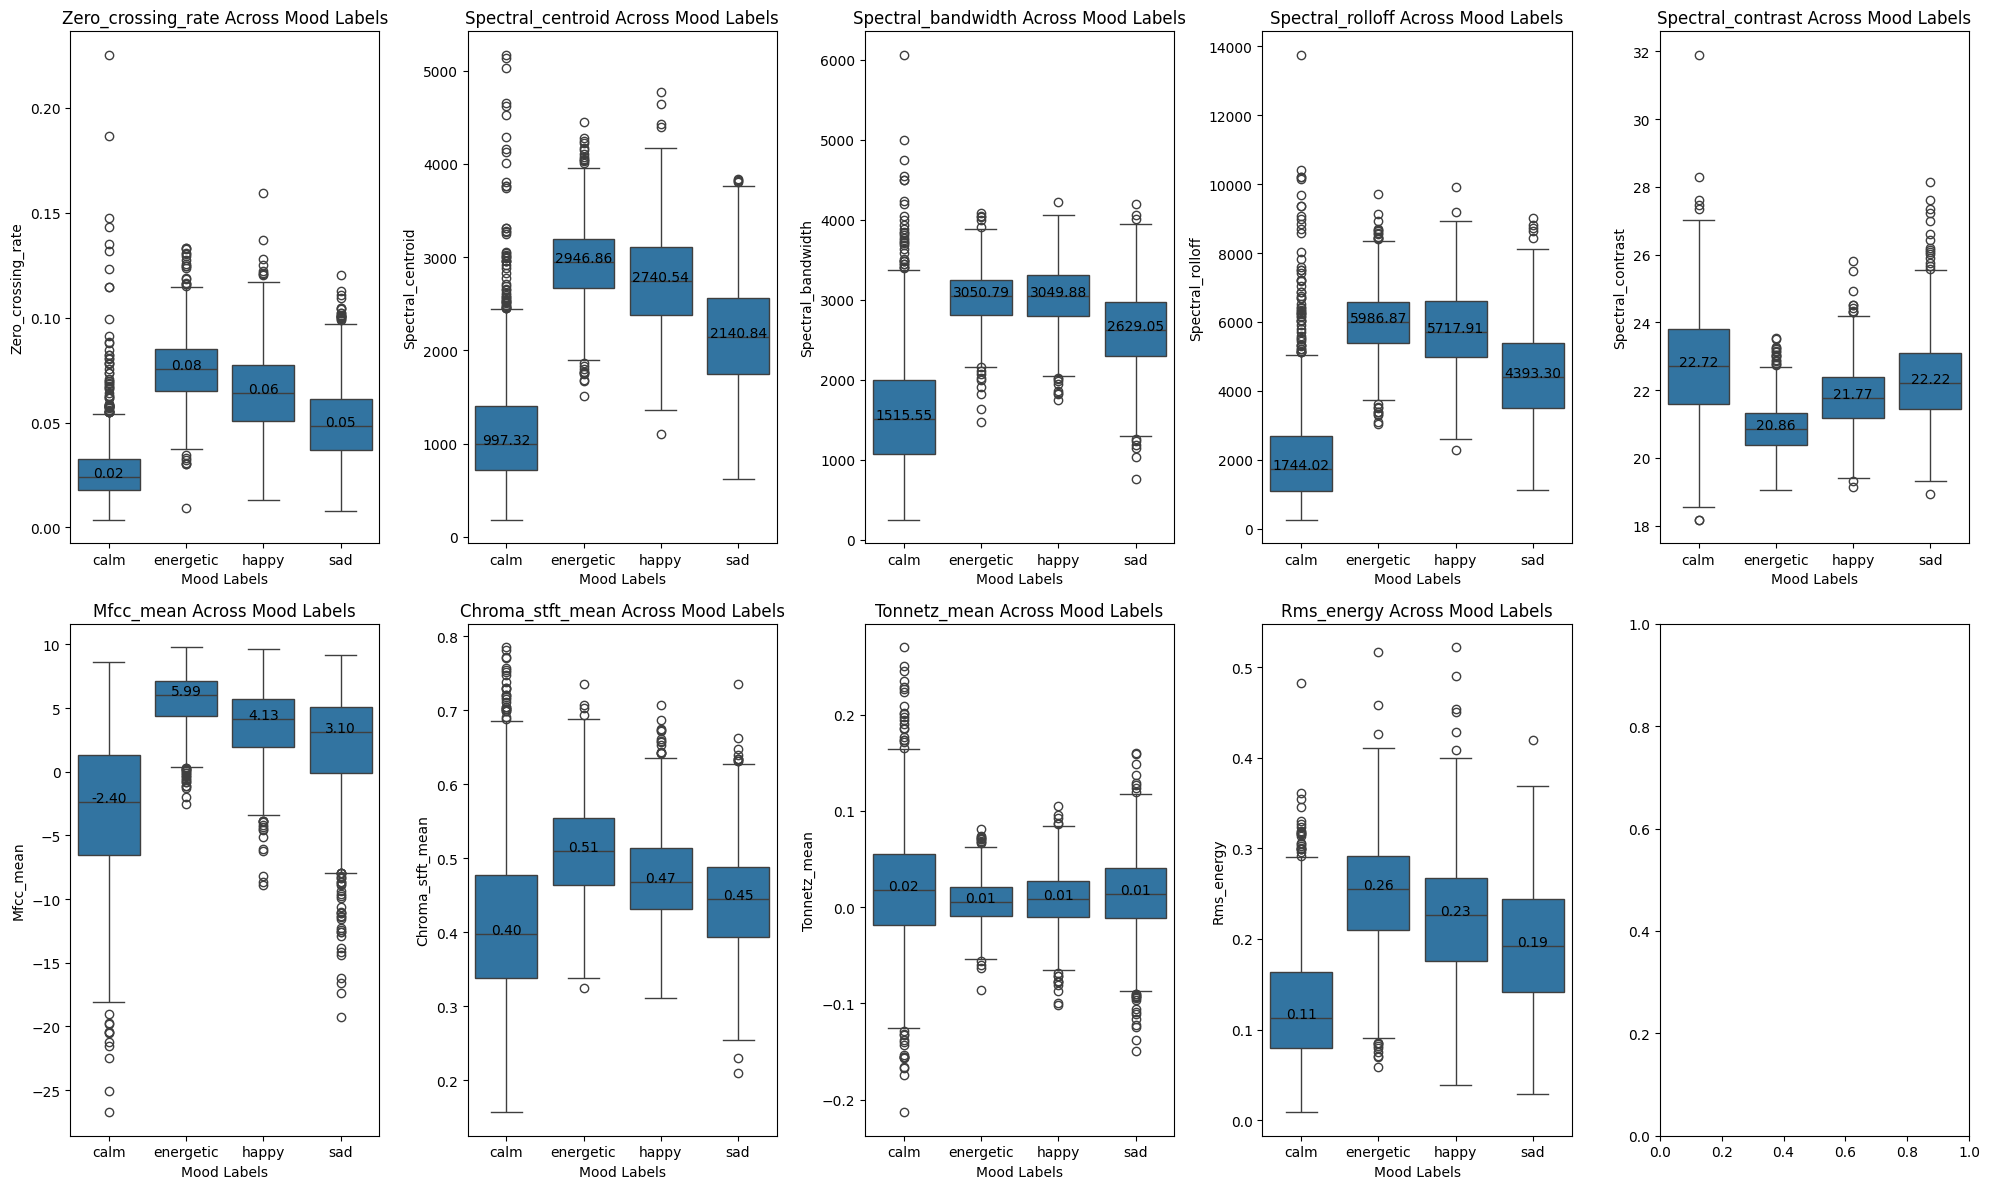

In [10]:
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}

# Map numerical labels to text labels
df['label_text'] = df['labels'].map(label_mapping)

# for feature in preview_audio_features:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df['label_text'], y=df[feature], order=['calm', 'energetic', 'happy', 'sad'])
#     plt.title(f"{feature.capitalize()} Across Mood Labels")
#     plt.xlabel("Mood Labels")
#     plt.ylabel(f"{feature.capitalize()}")

#     # Add median values
#     medians_corrected = df.groupby('label_text')[feature].median()
#     for i, median in enumerate(medians_corrected):
#         plt.text(i, median, f'{median:.2f}', horizontalalignment='center', color='black', fontsize=12)
#     print(medians_corrected)
#     plt.show()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharey=False)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each feature and its corresponding subplot
for idx, feature in enumerate(preview_audio_features):
    sns.boxplot(ax=axes[idx], x=df['label_text'], y=df[feature], 
                order=['calm', 'energetic', 'happy', 'sad'])
    axes[idx].set_title(f"{feature.capitalize()} Across Mood Labels")
    axes[idx].set_xlabel("Mood Labels")
    axes[idx].set_ylabel(f"{feature.capitalize()}")

    # Add median values
    medians_corrected = df.groupby('label_text')[feature].median()
    for i, median in enumerate(medians_corrected):
        axes[idx].text(i, median, f'{median:.2f}', horizontalalignment='center', 
                       color='black', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Conclusion:
## 1. Zero Crossing Rate
- **Highest Median**: **Energetic** (**0.0754**) – Tracks in the energetic mood have the most frequent zero crossings, indicating higher noisiness.
- **Lowest Median**: **Calm** (**0.0241**) – Reflects smoother audio characteristics typical of calm tracks.

## 2. Spectral Centroid
- **Highest Median**: **Energetic** (**2946.86**) – Indicates brighter tracks with higher frequencies dominating.
- **Lowest Median**: **Calm** (**997.32**) – Suggests darker and more mellow tracks.

## 3. Spectral Bandwidth
- **Highest Median**: **Energetic** (**3050.79**) – Energetic tracks exhibit a broad range of frequencies.
- **Lowest Median**: **Calm** (**1515.55**) – Indicates narrower frequency ranges consistent with serene tracks.

## 4. Spectral Rolloff
- **Highest Median**: **Energetic** (**5986.87**) – Tracks in this mood have significant high-frequency content.
- **Lowest Median**: **Calm** (**1744.02**) – Reflects minimal high-frequency energy.

## 5. Spectral Contrast
- **Highest Median**: **Calm** (**22.72**) – Suggests significant differences between spectral peaks and valleys.
- **Lowest Median**: **Energetic** (**20.86**) – Indicates slightly reduced spectral variation.

## 6. MFCC Mean
- **Highest Median**: **Energetic** (**5.99**) – Highlights high-energy tracks with richer spectral content.
- **Lowest Median**: **Calm** (**-2.40**) – Reflects minimal spectral content typical of softer tracks.

## 7. Chroma STFT Mean
- **Highest Median**: **Energetic** (**0.51**) – Indicates stronger harmonic content in energetic tracks.
- **Lowest Median**: **Calm** (**0.40**) – Reflects subtler harmonic tones.

## 8. Tonnetz Mean
- **Highest Median**: **Calm** (**0.0174**) – Tracks in the calm mood have richer tonal and harmonic structures.
- **Lowest Median**: **Energetic** (**0.0057**) – Indicates simpler harmonic content in energetic tracks.

## 9. RMS Energy
- **Highest Median**: **Energetic** (**0.2557**) – Tracks in this mood are the loudest and most dynamic.
- **Lowest Median**: **Calm** (**0.1129**) – Reflects softer and less dynamic tracks.

---

# Overall Insights
- **Energetic** tracks consistently dominate in features like **zero crossing rate**, **spectral centroid**, and **rms energy**, highlighting their dynamic and bright nature.
- **Calm** tracks show the lowest medians for most features, indicating smoother, darker, and less dynamic characteristics.
- Features like **spectral contrast** and **tonnetz mean** are more pronounced in calm tracks, suggesting rich tonal and spectral variations in serene moods